In [4]:
import pandas as pd

In [5]:
dtype2 ={'NM_VOTAVEL':'category',
        'DS_CARGO_PERGUNTA':'category',
        'QT_VOTOS':'int64',
       #  'QT_VOTOS':'category',
        'NR_ZONA':'category',
         'NM_MUNICIPIO':'category',
        

       }

In [6]:
coluna_ver = list(dtype2.keys())

In [7]:
#base_turno = pd.read_csv('SP_turno_1.csv',  sep=";",encoding='ISO-8859-1',usecols=coluna_ver,dtype= dtype2 )    

In [8]:

colunas_new =['NM_VOTAVEL',
        'DS_CARGO_PERGUNTA',
        'QT_VOTOS',

        'NR_ZONA',
         'NM_MUNICIPIO']


In [9]:
#chunk = pedaço

In [10]:
#contador=0
tabela = pd.DataFrame()
for chunk in pd.read_csv('SP_turno_1.csv',  sep=";",encoding='ISO-8859-1',chunksize=10000) :

   # Colunas = []
    Chunk_filtrado = chunk[colunas_new]


    prefeito= Chunk_filtrado.loc[(Chunk_filtrado['DS_CARGO_PERGUNTA'] == 'Prefeito')  & (Chunk_filtrado['NM_MUNICIPIO'] == 'SÃO PAULO') ]       
    resumoSP = pd.DataFrame(prefeito.groupby(['NM_MUNICIPIO','NR_ZONA','NM_VOTAVEL'], as_index=False).agg({'QT_VOTOS':'sum'}))    

    tabela =pd.concat([tabela,resumoSP])
    #display(resumoSP)
  #  contador +=1
   # if contador >2:
    #    break


In [11]:
display(tabela)

,NM_MUNICIPIO,NR_ZONA,NM_VOTAVEL,QT_VOTOS
0,SÃO PAULO,1,ANDREA MATARAZZO,360
1,SÃO PAULO,1,ANTÔNIO CARLOS,3
2,SÃO PAULO,1,ARTHUR DO VAL MAMÃE FALEI,1349
3,SÃO PAULO,1,BRUNO COVAS,6180
4,SÃO PAULO,1,Branco,599
...,...,...,...,...
10,SÃO PAULO,422,MARINA HELOU,38
11,SÃO PAULO,422,MÁRCIO FRANÇA,1407
12,SÃO PAULO,422,Nulo,1170
13,SÃO PAULO,422,ORLANDO SILVA,16


In [12]:
# big data, 16:35

In [13]:
resumoSP = pd.DataFrame(tabela.groupby(['NM_MUNICIPIO','NR_ZONA','NM_VOTAVEL'], as_index=False).agg({'QT_VOTOS':'sum'}))    


In [14]:
display(resumoSP)

,NM_MUNICIPIO,NR_ZONA,NM_VOTAVEL,QT_VOTOS
0,SÃO PAULO,1,ANDREA MATARAZZO,1688
1,SÃO PAULO,1,ANTÔNIO CARLOS,17
2,SÃO PAULO,1,ARTHUR DO VAL MAMÃE FALEI,6436
3,SÃO PAULO,1,BRUNO COVAS,28395
4,SÃO PAULO,1,Branco,3247
...,...,...,...,...
865,SÃO PAULO,422,MARINA HELOU,332
866,SÃO PAULO,422,MÁRCIO FRANÇA,13103
867,SÃO PAULO,422,Nulo,11075
868,SÃO PAULO,422,ORLANDO SILVA,117


In [15]:
import pandas as pd

columns_to_select = ['NM_MUNICIPIO','NR_ZONA','DS_FAIXA_ETARIA','CD_FAIXA_ETARIA']  # Substitua pelos nomes das colunas que você deseja selecionar

perfil_ano = pd.read_csv('perfil_eleitorado_2020.csv', sep=";",encoding='ISO-8859-1',usecols=columns_to_select)

In [16]:
display(perfil_ano)

,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA
0,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos
1,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos
2,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos
3,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos
4,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos
...,...,...,...,...
4248502,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos
4248503,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos
4248504,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos
4248505,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos


In [17]:
perfil_ano['Freq'] = perfil_ano.groupby(['NM_MUNICIPIO', 'NR_ZONA','DS_FAIXA_ETARIA'])['DS_FAIXA_ETARIA'].transform('count')

In [18]:
perfil_ano

,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos,60
1,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos,60
2,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos,60
3,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos,60
4,SÃO BENTO DO SAPUCAÍ,314,7074,70 a 74 anos,60
...,...,...,...,...,...
4248502,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos,47
4248503,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos,47
4248504,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos,47
4248505,FLOR DA SERRA DO SUL,140,4549,45 a 49 anos,47


In [19]:
perfil_idadeSP= perfil_ano.loc[(perfil_ano['NM_MUNICIPIO'] == 'SÃO PAULO') ]

In [20]:
display(perfil_idadeSP)

,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
63223,SÃO PAULO,3,6569,65 a 69 anos,81
63224,SÃO PAULO,3,7074,70 a 74 anos,80
63225,SÃO PAULO,3,7074,70 a 74 anos,80
63226,SÃO PAULO,3,7074,70 a 74 anos,80
63227,SÃO PAULO,3,7074,70 a 74 anos,80
...,...,...,...,...,...
3979871,SÃO PAULO,280,4549,45 a 49 anos,74
3979872,SÃO PAULO,280,4549,45 a 49 anos,74
3979873,SÃO PAULO,280,5054,50 a 54 anos,83
3979874,SÃO PAULO,280,5054,50 a 54 anos,83


In [21]:
lista_corr = ["NR_ZONA","CD_FAIXA_ETARIA","Freq"]

In [22]:
nota_2 =perfil_idadeSP[lista_corr].corr()

In [23]:
list(resumoSP.columns)

['NM_MUNICIPIO', 'NR_ZONA', 'NM_VOTAVEL', 'QT_VOTOS']

In [24]:
display(nota_2)

,NR_ZONA,CD_FAIXA_ETARIA,Freq
NR_ZONA,1.000000,-0.068778,-0.050678
CD_FAIXA_ETARIA,-0.068778,1.000000,0.394824
Freq,-0.050678,0.394824,1.000000


In [25]:
#nota_3 =perfil_idadeSP[lista_corr] & resumoSP[['NR_ZONA','QT_VOTOS']].corr()

In [26]:
correlation_matrix = perfil_idadeSP.corrwith(resumoSP)

print("Matriz de correlação entre todas as colunas:")
print(correlation_matrix)

Matriz de correlação entre todas as colunas:
NM_MUNICIPIO       NaN
NR_ZONA            NaN
CD_FAIXA_ETARIA    NaN
DS_FAIXA_ETARIA    NaN
Freq               NaN
NM_VOTAVEL         NaN
QT_VOTOS           NaN
dtype: object


In [27]:
# Definindo a lista de colunas para correlação
lista_corr = ["NR_ZONA", "CD_FAIXA_ETARIA", "Freq"]

# Calculando a correlação entre as colunas em perfil_idadeSP e resumoSP
correlacao = perfil_idadeSP[lista_corr].corrwith(resumoSP[['NR_ZONA', 'QT_VOTOS']])

print("Correlação entre as colunas:")
print(correlacao)


Correlação entre as colunas:
NR_ZONA           NaN
CD_FAIXA_ETARIA   NaN
Freq              NaN
QT_VOTOS          NaN
dtype: float64


In [28]:
perfil_idadeSP['CD_FAIXA_ETARIA'].value_counts()

CD_FAIXA_ETARIA
 6569    4880
 6064    4863
 5559    4859
 7074    4803
 5054    4623
 7579    4605
 8084    4238
 4549    4186
 4044    3913
 8589    3670
 3539    3529
 9094    3310
 3034    3000
 9599    2896
 2529    2452
 2124    1859
 9999    1330
 2000    1130
 1900    1006
 1800     760
 1700     584
 1600     268
-3         72
Name: count, dtype: int64

In [29]:
perfil_idadeSP['DS_FAIXA_ETARIA'].value_counts()

DS_FAIXA_ETARIA
65 a 69 anos                      4880
60 a 64 anos                      4863
55 a 59 anos                      4859
70 a 74 anos                      4803
50 a 54 anos                      4623
75 a 79 anos                      4605
80 a 84 anos                      4238
45 a 49 anos                      4186
40 a 44 anos                      3913
85 a 89 anos                      3670
35 a 39 anos                      3529
90 a 94 anos                      3310
30 a 34 anos                      3000
95 a 99 anos                      2896
25 a 29 anos                      2452
21 a 24 anos                      1859
100 anos ou mais                  1330
20 anos                           1130
19 anos                           1006
18 anos                            760
17 anos                            584
16 anos                            268
Inválido                            72
Name: count, dtype: int64

In [30]:
primeiroTURNO_Bruno= resumoSP.loc[(resumoSP['NM_VOTAVEL'] == 'BRUNO COVAS')]


In [31]:
primeiroTURNO_Bruno1=(primeiroTURNO_Bruno.reset_index())

In [32]:
primeiroTURNO_Bruno1

,index,NM_MUNICIPIO,NR_ZONA,NM_VOTAVEL,QT_VOTOS
0,3,SÃO PAULO,1,BRUNO COVAS,28395
1,18,SÃO PAULO,2,BRUNO COVAS,40083
2,33,SÃO PAULO,3,BRUNO COVAS,13008
3,48,SÃO PAULO,4,BRUNO COVAS,34482
4,63,SÃO PAULO,5,BRUNO COVAS,31379
5,78,SÃO PAULO,6,BRUNO COVAS,37966
6,93,SÃO PAULO,20,BRUNO COVAS,23802
7,108,SÃO PAULO,246,BRUNO COVAS,30050
8,123,SÃO PAULO,247,BRUNO COVAS,18817
9,138,SÃO PAULO,248,BRUNO COVAS,25826


In [33]:
Idade65_69 = perfil_idadeSP.loc[(perfil_idadeSP['DS_FAIXA_ETARIA'].str.strip() == '65 a 69 anos')] 

In [34]:
#Idade65_69
Idade65_69 = pd.DataFrame(Idade65_69.groupby(['NM_MUNICIPIO','NR_ZONA','CD_FAIXA_ETARIA','DS_FAIXA_ETARIA'], as_index=False).agg({'Freq':'sum'}))    


In [35]:
Idade65_69

,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,6569,65 a 69 anos,8100
1,SÃO PAULO,2,6569,65 a 69 anos,7056
2,SÃO PAULO,3,6569,65 a 69 anos,6561
3,SÃO PAULO,4,6569,65 a 69 anos,7396
4,SÃO PAULO,5,6569,65 a 69 anos,6561
5,SÃO PAULO,6,6569,65 a 69 anos,6889
6,SÃO PAULO,20,6569,65 a 69 anos,6400
7,SÃO PAULO,246,6569,65 a 69 anos,7056
8,SÃO PAULO,247,6569,65 a 69 anos,6724
9,SÃO PAULO,248,6569,65 a 69 anos,7569


In [36]:
str(' vteste  ').strip()

'vteste'

In [37]:
correlacao = primeiroTURNO_Bruno1[['NR_ZONA', 'QT_VOTOS']].corrwith(Idade65_69[['NR_ZONA', 'Freq']])

print("Correlação entre as colunas:")
print(correlacao)

Correlação entre as colunas:
NR_ZONA     1.0
Freq        NaN
QT_VOTOS    NaN
dtype: float64


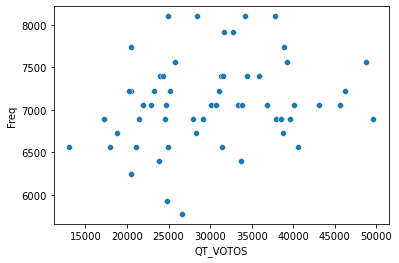

In [38]:
# Correlação 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=primeiroTURNO_Bruno1['QT_VOTOS'], y=Idade65_69['Freq'])

plt.show()



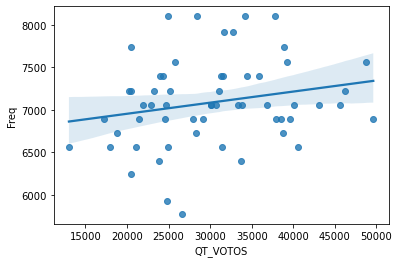

In [39]:
# Correlação 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=primeiroTURNO_Bruno1['QT_VOTOS'], y=Idade65_69['Freq'])

plt.show()



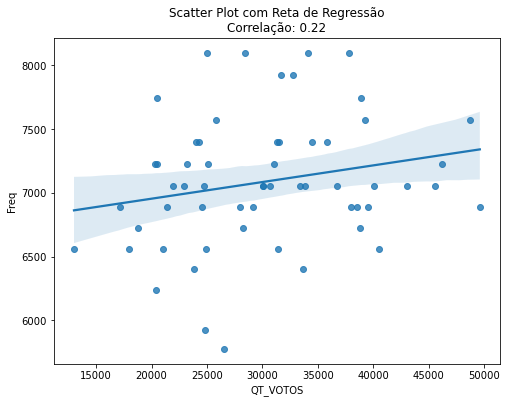

In [40]:
correlacao = primeiroTURNO_Bruno1['QT_VOTOS'].corr(Idade65_69['Freq'])

# Exemplo de plot de scatter plot com reta de regressão e valor de correlação
plt.figure(figsize=(8, 6))
sns.regplot(x=primeiroTURNO_Bruno1['QT_VOTOS'], y=Idade65_69['Freq'])
plt.title(f'Scatter Plot com Reta de Regressão\nCorrelação: {correlacao:.2f}')
plt.xlabel('QT_VOTOS')
plt.ylabel('Freq')
plt.show()

In [41]:
def analise_idade(periodo_texto):
    idade = perfil_idadeSP.loc[(perfil_idadeSP['DS_FAIXA_ETARIA'] == periodo_texto)] 

   # idade = perfil_idadeSP.loc[(perfil_idadeSP['DS_FAIXA_ETARIA'].str.strip() == periodo_texto)] 
    idade_new = pd.DataFrame(idade.groupby(['NM_MUNICIPIO','NR_ZONA','CD_FAIXA_ETARIA','DS_FAIXA_ETARIA'], as_index=False).agg({'Freq':'sum'}))    
    return (idade_new)

In [42]:
dados_idade = pd.DataFrame(perfil_idadeSP['DS_FAIXA_ETARIA'].value_counts())

In [43]:
dados_idade = dados_idade.reset_index()

In [44]:
print('Perfil dos eleitores na cidade de São Paulo')

Perfil dos eleitores na cidade de São Paulo


In [45]:
dados_idade

,DS_FAIXA_ETARIA,count
0,65 a 69 anos,4880
1,60 a 64 anos,4863
2,55 a 59 anos,4859
3,70 a 74 anos,4803
4,50 a 54 anos,4623
5,75 a 79 anos,4605
6,80 a 84 anos,4238
7,45 a 49 anos,4186
8,40 a 44 anos,3913
9,85 a 89 anos,3670


In [46]:
def grafico_correlacao(periodo_texto,idade_new2):

    correlacao = primeiroTURNO_Bruno1['QT_VOTOS'].corr(idade_new2['Freq'])

    # Exemplo de plot de scatter plot com reta de regressão e valor de correlação
    plt.figure(figsize=(8, 6))
    sns.regplot(x=primeiroTURNO_Bruno1['QT_VOTOS'], y=idade_new2['Freq'])
    plt.title(f'Scatter Plot com Reta de Regressão em {periodo_texto} \npara o Voto do Bruno Covas (no Primeiro Turno)\nCorrelação : {correlacao:.2f}')
    plt.xlabel('QT_VOTOS_candidato_Bruno')
    plt.ylabel('Freq_idade')
    plt.show()
    
    return correlacao

65 a 69 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,6569,65 a 69 anos,8100
1,SÃO PAULO,2,6569,65 a 69 anos,7056
2,SÃO PAULO,3,6569,65 a 69 anos,6561
3,SÃO PAULO,4,6569,65 a 69 anos,7396
4,SÃO PAULO,5,6569,65 a 69 anos,6561
5,SÃO PAULO,6,6569,65 a 69 anos,6889
6,SÃO PAULO,20,6569,65 a 69 anos,6400
7,SÃO PAULO,246,6569,65 a 69 anos,7056
8,SÃO PAULO,247,6569,65 a 69 anos,6724
9,SÃO PAULO,248,6569,65 a 69 anos,7569


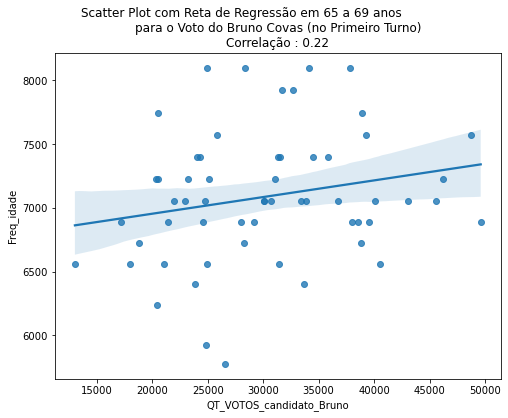

60 a 64 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,6064,60 a 64 anos,7396
1,SÃO PAULO,2,6064,60 a 64 anos,6724
2,SÃO PAULO,3,6064,60 a 64 anos,6561
3,SÃO PAULO,4,6064,60 a 64 anos,7396
4,SÃO PAULO,5,6064,60 a 64 anos,5929
5,SÃO PAULO,6,6064,60 a 64 anos,6561
6,SÃO PAULO,20,6064,60 a 64 anos,6561
7,SÃO PAULO,246,6064,60 a 64 anos,6724
8,SÃO PAULO,247,6064,60 a 64 anos,7569
9,SÃO PAULO,248,6064,60 a 64 anos,7569


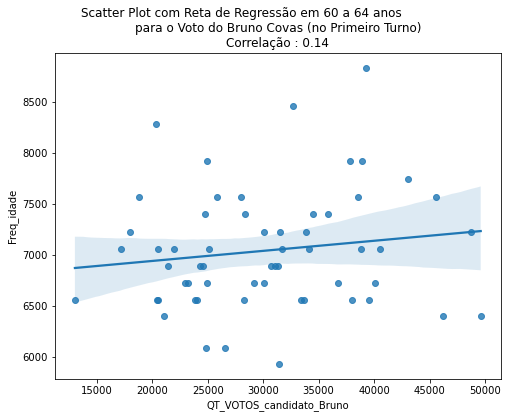

55 a 59 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,5559,55 a 59 anos,7569
1,SÃO PAULO,2,5559,55 a 59 anos,6400
2,SÃO PAULO,3,5559,55 a 59 anos,6561
3,SÃO PAULO,4,5559,55 a 59 anos,7056
4,SÃO PAULO,5,5559,55 a 59 anos,6400
5,SÃO PAULO,6,5559,55 a 59 anos,6241
6,SÃO PAULO,20,5559,55 a 59 anos,6889
7,SÃO PAULO,246,5559,55 a 59 anos,6241
8,SÃO PAULO,247,5559,55 a 59 anos,7225
9,SÃO PAULO,248,5559,55 a 59 anos,7225


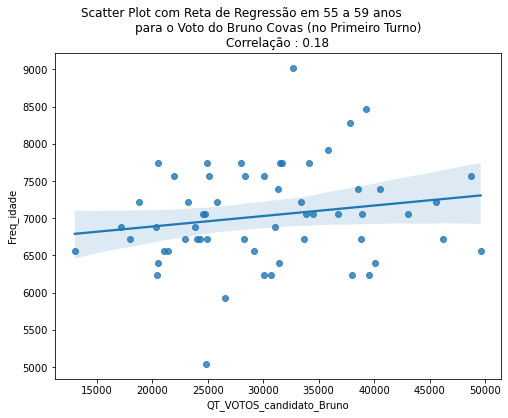

70 a 74 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,7074,70 a 74 anos,7569
1,SÃO PAULO,2,7074,70 a 74 anos,7056
2,SÃO PAULO,3,7074,70 a 74 anos,6400
3,SÃO PAULO,4,7074,70 a 74 anos,6561
4,SÃO PAULO,5,7074,70 a 74 anos,6241
5,SÃO PAULO,6,7074,70 a 74 anos,7056
6,SÃO PAULO,20,7074,70 a 74 anos,5476
7,SÃO PAULO,246,7074,70 a 74 anos,6724
8,SÃO PAULO,247,7074,70 a 74 anos,7569
9,SÃO PAULO,248,7074,70 a 74 anos,7744


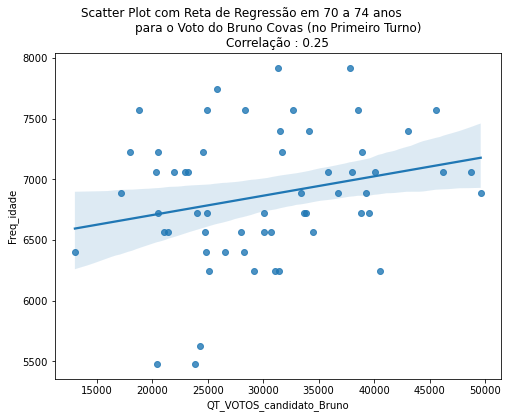

50 a 54 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,5054,50 a 54 anos,6889
1,SÃO PAULO,2,5054,50 a 54 anos,5329
2,SÃO PAULO,3,5054,50 a 54 anos,5625
3,SÃO PAULO,4,5054,50 a 54 anos,6084
4,SÃO PAULO,5,5054,50 a 54 anos,5041
5,SÃO PAULO,6,5054,50 a 54 anos,5184
6,SÃO PAULO,20,5054,50 a 54 anos,6241
7,SÃO PAULO,246,5054,50 a 54 anos,6084
8,SÃO PAULO,247,5054,50 a 54 anos,6400
9,SÃO PAULO,248,5054,50 a 54 anos,7056


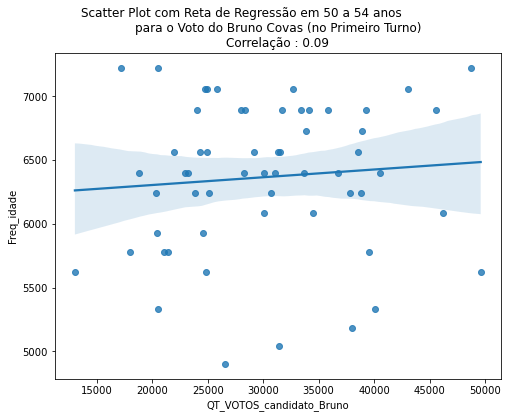

75 a 79 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,7579,75 a 79 anos,7225
1,SÃO PAULO,2,7579,75 a 79 anos,7396
2,SÃO PAULO,3,7579,75 a 79 anos,6241
3,SÃO PAULO,4,7579,75 a 79 anos,6561
4,SÃO PAULO,5,7579,75 a 79 anos,6400
5,SÃO PAULO,6,7579,75 a 79 anos,6889
6,SÃO PAULO,20,7579,75 a 79 anos,5929
7,SÃO PAULO,246,7579,75 a 79 anos,6889
8,SÃO PAULO,247,7579,75 a 79 anos,6889
9,SÃO PAULO,248,7579,75 a 79 anos,6561


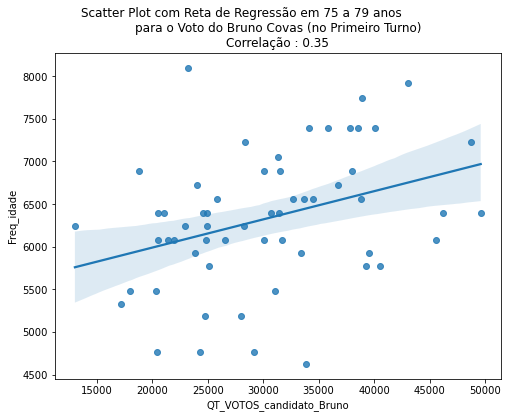

80 a 84 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,8084,80 a 84 anos,7225
1,SÃO PAULO,2,8084,80 a 84 anos,6724
2,SÃO PAULO,3,8084,80 a 84 anos,6084
3,SÃO PAULO,4,8084,80 a 84 anos,7056
4,SÃO PAULO,5,8084,80 a 84 anos,6241
5,SÃO PAULO,6,8084,80 a 84 anos,6241
6,SÃO PAULO,20,8084,80 a 84 anos,3249
7,SÃO PAULO,246,8084,80 a 84 anos,6400
8,SÃO PAULO,247,8084,80 a 84 anos,4489
9,SÃO PAULO,248,8084,80 a 84 anos,5041


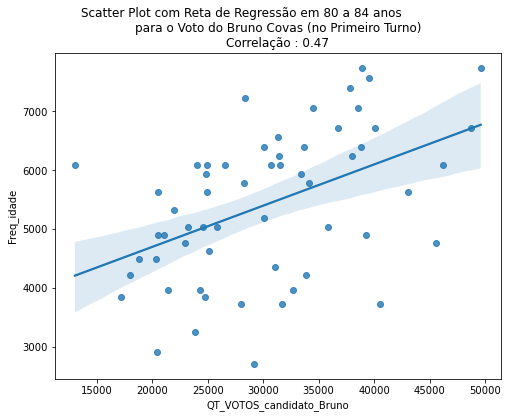

45 a 49 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,4549,45 a 49 anos,5184
1,SÃO PAULO,2,4549,45 a 49 anos,4761
2,SÃO PAULO,3,4549,45 a 49 anos,4761
3,SÃO PAULO,4,4549,45 a 49 anos,5184
4,SÃO PAULO,5,4549,45 a 49 anos,4225
5,SÃO PAULO,6,4549,45 a 49 anos,4761
6,SÃO PAULO,20,4549,45 a 49 anos,5476
7,SÃO PAULO,246,4549,45 a 49 anos,4356
8,SÃO PAULO,247,4549,45 a 49 anos,4900
9,SÃO PAULO,248,4549,45 a 49 anos,5476


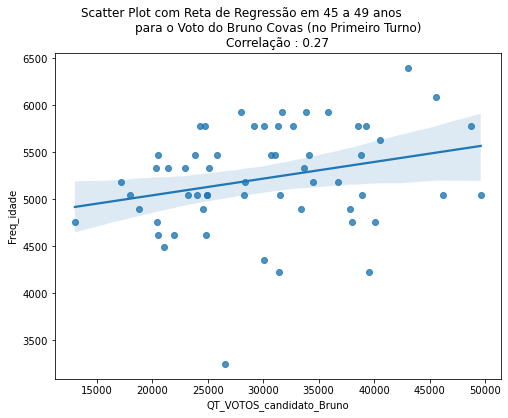

40 a 44 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,4044,40 a 44 anos,4761
1,SÃO PAULO,2,4044,40 a 44 anos,4489
2,SÃO PAULO,3,4044,40 a 44 anos,4096
3,SÃO PAULO,4,4044,40 a 44 anos,4225
4,SÃO PAULO,5,4044,40 a 44 anos,3364
5,SÃO PAULO,6,4044,40 a 44 anos,4096
6,SÃO PAULO,20,4044,40 a 44 anos,5184
7,SÃO PAULO,246,4044,40 a 44 anos,3481
8,SÃO PAULO,247,4044,40 a 44 anos,4489
9,SÃO PAULO,248,4044,40 a 44 anos,4356


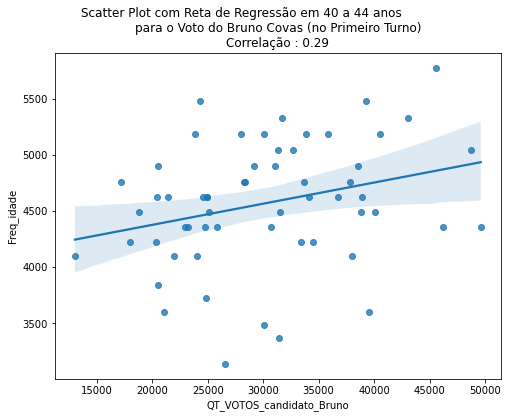

85 a 89 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,8589,85 a 89 anos,7396
1,SÃO PAULO,2,8589,85 a 89 anos,7056
2,SÃO PAULO,3,8589,85 a 89 anos,5625
3,SÃO PAULO,4,8589,85 a 89 anos,6084
4,SÃO PAULO,5,8589,85 a 89 anos,5929
5,SÃO PAULO,6,8589,85 a 89 anos,6241
6,SÃO PAULO,20,8589,85 a 89 anos,1936
7,SÃO PAULO,246,8589,85 a 89 anos,6084
8,SÃO PAULO,247,8589,85 a 89 anos,3844
9,SÃO PAULO,248,8589,85 a 89 anos,3969


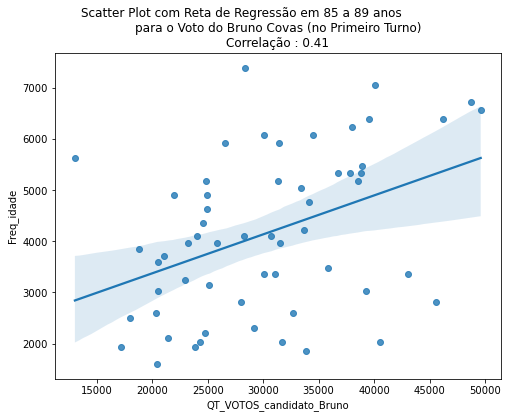

35 a 39 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,3539,35 a 39 anos,3721
1,SÃO PAULO,2,3539,35 a 39 anos,2916
2,SÃO PAULO,3,3539,35 a 39 anos,3136
3,SÃO PAULO,4,3539,35 a 39 anos,3721
4,SÃO PAULO,5,3539,35 a 39 anos,2601
5,SÃO PAULO,6,3539,35 a 39 anos,2809
6,SÃO PAULO,20,3539,35 a 39 anos,3969
7,SÃO PAULO,246,3539,35 a 39 anos,2916
8,SÃO PAULO,247,3539,35 a 39 anos,3025
9,SÃO PAULO,248,3539,35 a 39 anos,4225


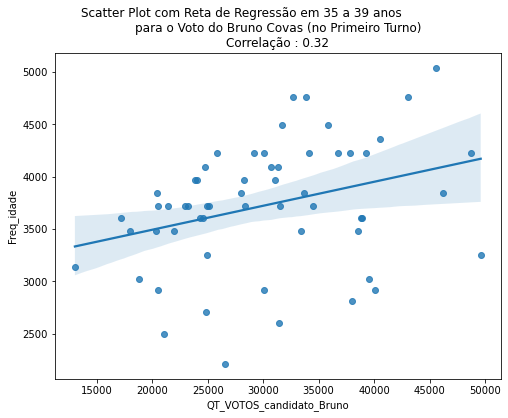

90 a 94 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,9094,90 a 94 anos,6400
1,SÃO PAULO,2,9094,90 a 94 anos,6724
2,SÃO PAULO,3,9094,90 a 94 anos,5625
3,SÃO PAULO,4,9094,90 a 94 anos,6241
4,SÃO PAULO,5,9094,90 a 94 anos,5929
5,SÃO PAULO,6,9094,90 a 94 anos,6724
6,SÃO PAULO,20,9094,90 a 94 anos,1681
7,SÃO PAULO,246,9094,90 a 94 anos,4761
8,SÃO PAULO,247,9094,90 a 94 anos,2025
9,SÃO PAULO,248,9094,90 a 94 anos,2704


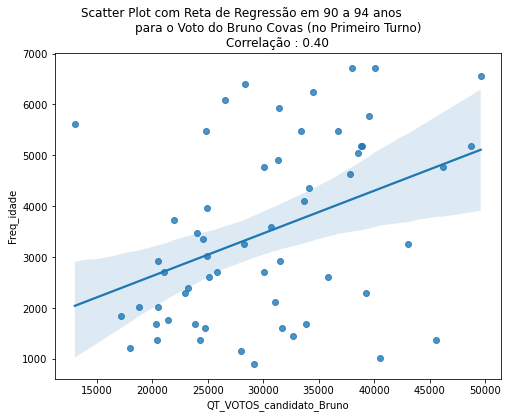

30 a 34 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,3034,30 a 34 anos,3025
1,SÃO PAULO,2,3034,30 a 34 anos,2304
2,SÃO PAULO,3,3034,30 a 34 anos,2304
3,SÃO PAULO,4,3034,30 a 34 anos,2500
4,SÃO PAULO,5,3034,30 a 34 anos,1296
5,SÃO PAULO,6,3034,30 a 34 anos,2209
6,SÃO PAULO,20,3034,30 a 34 anos,3025
7,SÃO PAULO,246,3034,30 a 34 anos,1764
8,SÃO PAULO,247,3034,30 a 34 anos,2401
9,SÃO PAULO,248,3034,30 a 34 anos,3025


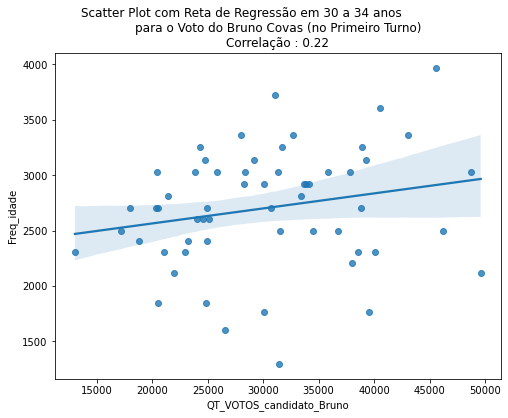

95 a 99 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,9599,95 a 99 anos,6084
1,SÃO PAULO,2,9599,95 a 99 anos,6241
2,SÃO PAULO,3,9599,95 a 99 anos,4225
3,SÃO PAULO,4,9599,95 a 99 anos,5476
4,SÃO PAULO,5,9599,95 a 99 anos,5476
5,SÃO PAULO,6,9599,95 a 99 anos,5929
6,SÃO PAULO,20,9599,95 a 99 anos,1024
7,SÃO PAULO,246,9599,95 a 99 anos,5041
8,SÃO PAULO,247,9599,95 a 99 anos,1936
9,SÃO PAULO,248,9599,95 a 99 anos,1681


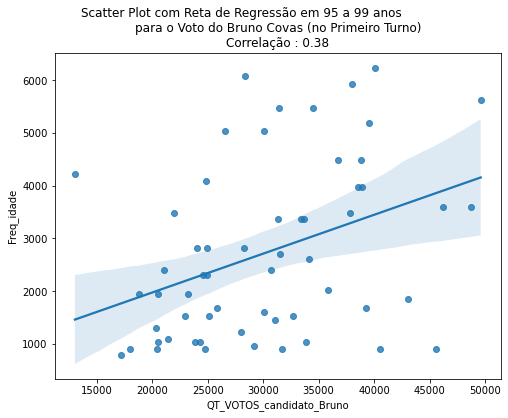

25 a 29 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,2529,25 a 29 anos,1764
1,SÃO PAULO,2,2529,25 a 29 anos,1369
2,SÃO PAULO,3,2529,25 a 29 anos,1849
3,SÃO PAULO,4,2529,25 a 29 anos,1600
4,SÃO PAULO,5,2529,25 a 29 anos,729
5,SÃO PAULO,6,2529,25 a 29 anos,1444
6,SÃO PAULO,20,2529,25 a 29 anos,1849
7,SÃO PAULO,246,2529,25 a 29 anos,1369
8,SÃO PAULO,247,2529,25 a 29 anos,1444
9,SÃO PAULO,248,2529,25 a 29 anos,2500


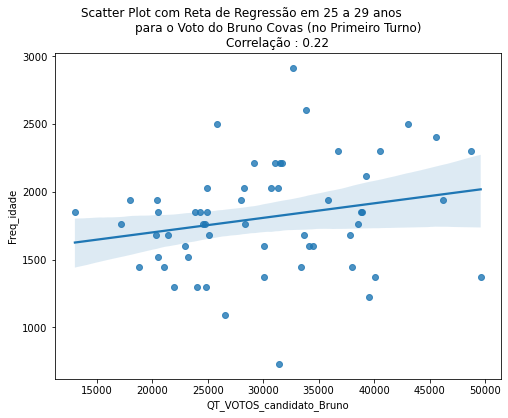

21 a 24 anos                  


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,2124,21 a 24 anos,1089
1,SÃO PAULO,2,2124,21 a 24 anos,841
2,SÃO PAULO,3,2124,21 a 24 anos,961
3,SÃO PAULO,4,2124,21 a 24 anos,784
4,SÃO PAULO,5,2124,21 a 24 anos,441
5,SÃO PAULO,6,2124,21 a 24 anos,625
6,SÃO PAULO,20,2124,21 a 24 anos,1369
7,SÃO PAULO,246,2124,21 a 24 anos,784
8,SÃO PAULO,247,2124,21 a 24 anos,900
9,SÃO PAULO,248,2124,21 a 24 anos,900


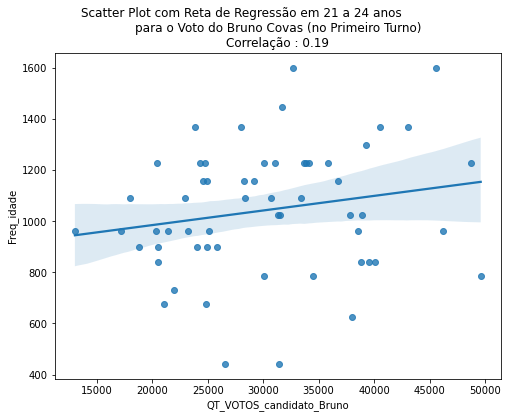

100 anos ou mais              


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,9999,100 anos ou mais,3364
1,SÃO PAULO,2,9999,100 anos ou mais,3721
2,SÃO PAULO,3,9999,100 anos ou mais,1521
3,SÃO PAULO,4,9999,100 anos ou mais,1521
4,SÃO PAULO,5,9999,100 anos ou mais,2401
5,SÃO PAULO,6,9999,100 anos ou mais,2304
6,SÃO PAULO,20,9999,100 anos ou mais,100
7,SÃO PAULO,246,9999,100 anos ou mais,784
8,SÃO PAULO,247,9999,100 anos ou mais,361
9,SÃO PAULO,248,9999,100 anos ou mais,256


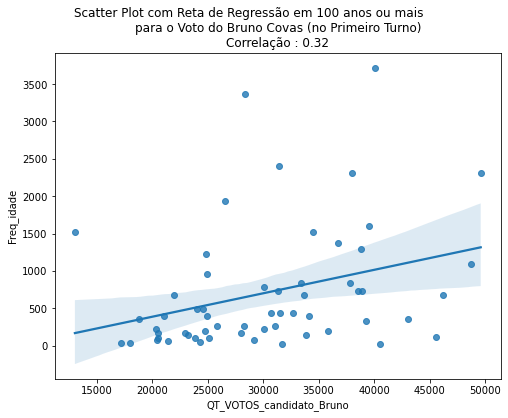

20 anos                       


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,2000,20 anos,225
1,SÃO PAULO,2,2000,20 anos,289
2,SÃO PAULO,3,2000,20 anos,289
3,SÃO PAULO,4,2000,20 anos,529
4,SÃO PAULO,5,2000,20 anos,256
5,SÃO PAULO,6,2000,20 anos,144
6,SÃO PAULO,20,2000,20 anos,625
7,SÃO PAULO,246,2000,20 anos,256
8,SÃO PAULO,247,2000,20 anos,361
9,SÃO PAULO,248,2000,20 anos,441


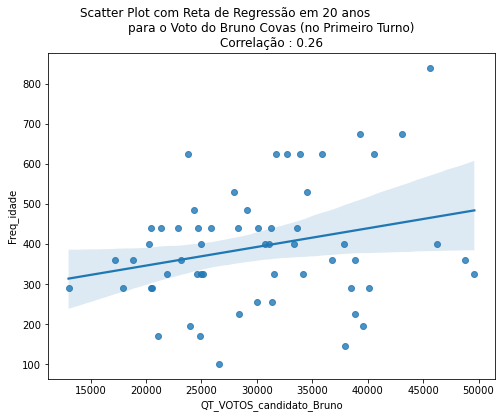

19 anos                       


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,1900,19 anos,256
1,SÃO PAULO,2,1900,19 anos,289
2,SÃO PAULO,3,1900,19 anos,196
3,SÃO PAULO,4,1900,19 anos,289
4,SÃO PAULO,5,1900,19 anos,121
5,SÃO PAULO,6,1900,19 anos,256
6,SÃO PAULO,20,1900,19 anos,441
7,SÃO PAULO,246,1900,19 anos,225
8,SÃO PAULO,247,1900,19 anos,256
9,SÃO PAULO,248,1900,19 anos,324


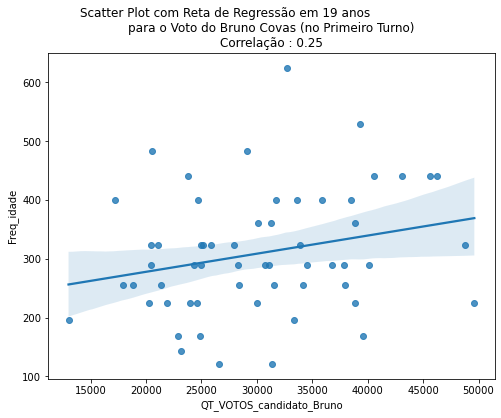

18 anos                       


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,1800,18 anos,144
1,SÃO PAULO,2,1800,18 anos,121
2,SÃO PAULO,3,1800,18 anos,196
3,SÃO PAULO,4,1800,18 anos,196
4,SÃO PAULO,5,1800,18 anos,100
5,SÃO PAULO,6,1800,18 anos,144
6,SÃO PAULO,20,1800,18 anos,196
7,SÃO PAULO,246,1800,18 anos,81
8,SÃO PAULO,247,1800,18 anos,144
9,SÃO PAULO,248,1800,18 anos,196


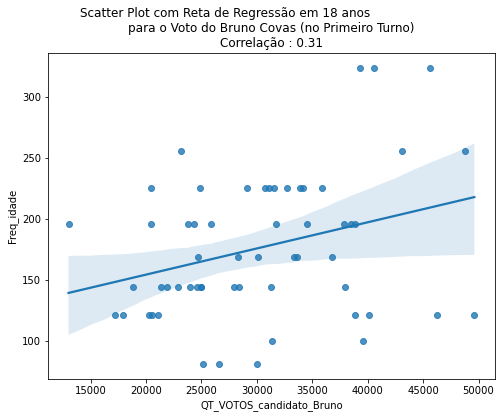

17 anos                       


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,1700,17 anos,100
1,SÃO PAULO,2,1700,17 anos,81
2,SÃO PAULO,3,1700,17 anos,64
3,SÃO PAULO,4,1700,17 anos,100
4,SÃO PAULO,5,1700,17 anos,64
5,SÃO PAULO,6,1700,17 anos,81
6,SÃO PAULO,20,1700,17 anos,144
7,SÃO PAULO,246,1700,17 anos,100
8,SÃO PAULO,247,1700,17 anos,100
9,SÃO PAULO,248,1700,17 anos,81


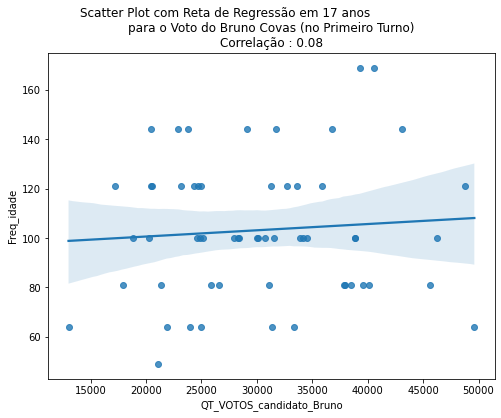

16 anos                       


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,1600,16 anos,16
1,SÃO PAULO,2,1600,16 anos,9
2,SÃO PAULO,3,1600,16 anos,25
3,SÃO PAULO,4,1600,16 anos,36
4,SÃO PAULO,5,1600,16 anos,49
5,SÃO PAULO,6,1600,16 anos,25
6,SÃO PAULO,20,1600,16 anos,25
7,SÃO PAULO,246,1600,16 anos,9
8,SÃO PAULO,247,1600,16 anos,9
9,SÃO PAULO,248,1600,16 anos,25


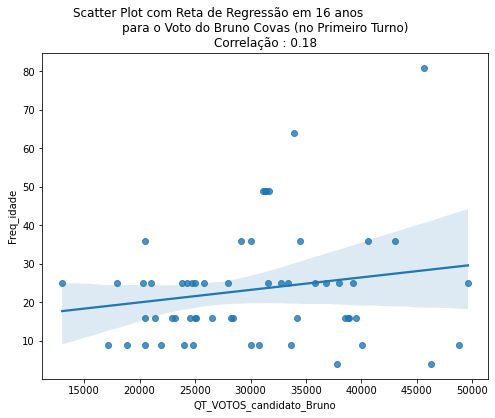

Inválido                      


,NM_MUNICIPIO,NR_ZONA,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,Freq
0,SÃO PAULO,1,-3,Inválido,9
1,SÃO PAULO,4,-3,Inválido,4
2,SÃO PAULO,5,-3,Inválido,1
3,SÃO PAULO,6,-3,Inválido,4
4,SÃO PAULO,20,-3,Inválido,4
5,SÃO PAULO,246,-3,Inválido,1
6,SÃO PAULO,247,-3,Inválido,1
7,SÃO PAULO,248,-3,Inválido,1
8,SÃO PAULO,249,-3,Inválido,1
9,SÃO PAULO,250,-3,Inválido,9


<Figure size 576x432 with 0 Axes>

In [49]:
for faixa_idade in dados_idade['DS_FAIXA_ETARIA']:
    print(faixa_idade)
    try:
        faixa_df= analise_idade(faixa_idade)
        display(faixa_df)

    
        grafico_correlacao(faixa_idade,faixa_df)
    except ValueError :
        pass


In [50]:
print('teste')

teste


65 a 69 anos                  


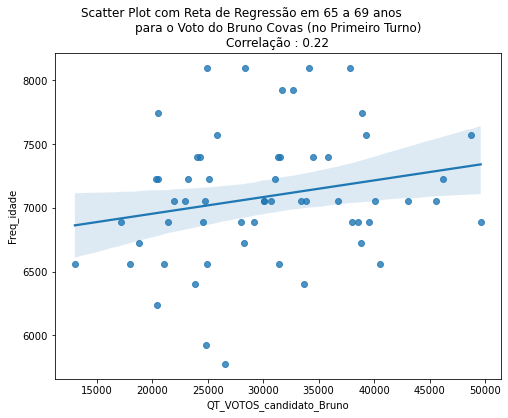

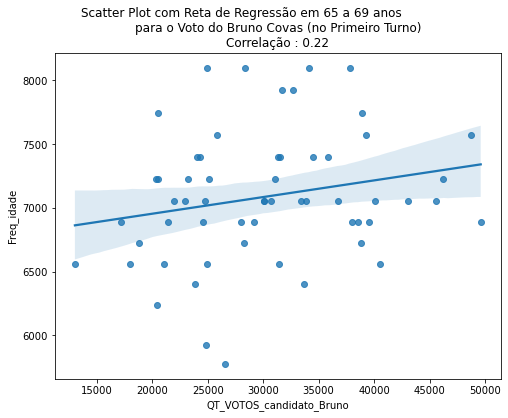

60 a 64 anos                  


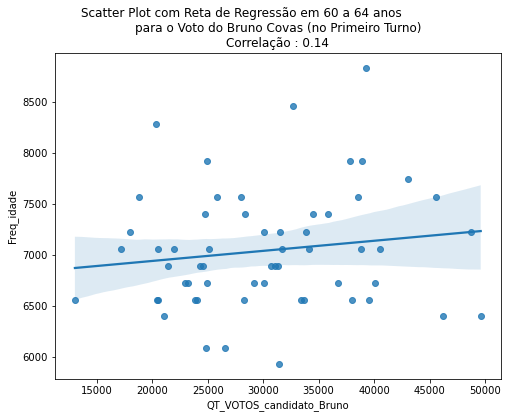

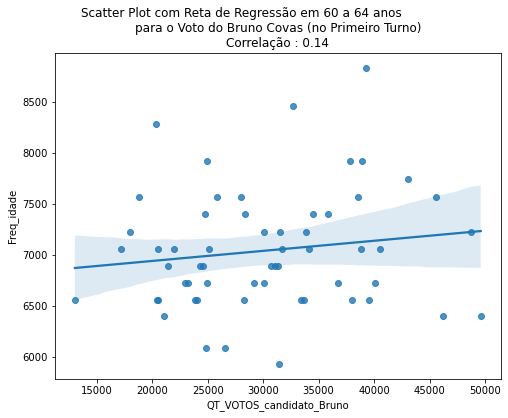

55 a 59 anos                  


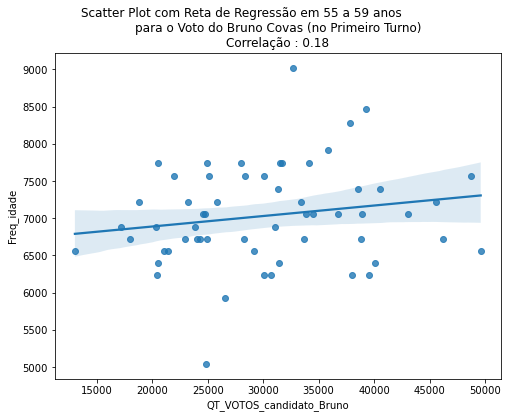

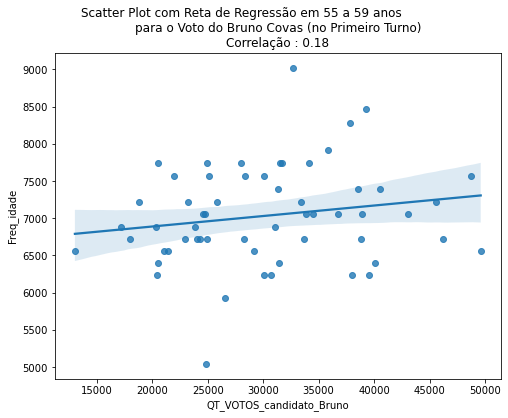

70 a 74 anos                  


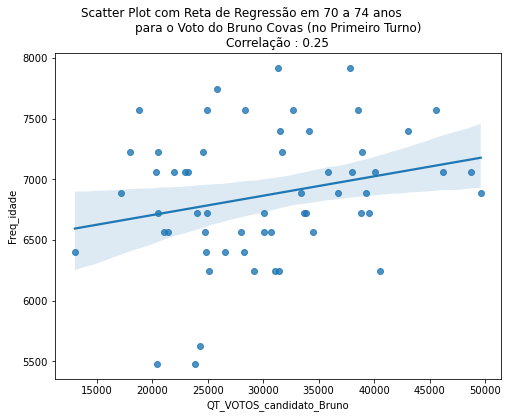

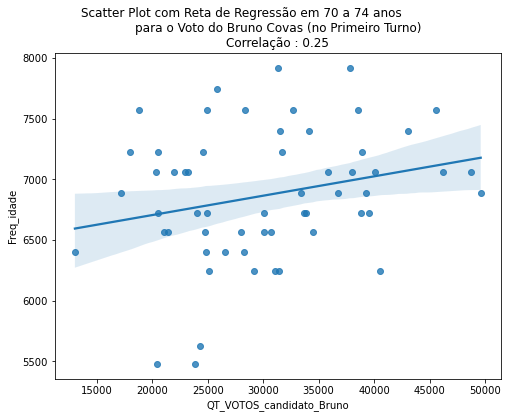

50 a 54 anos                  


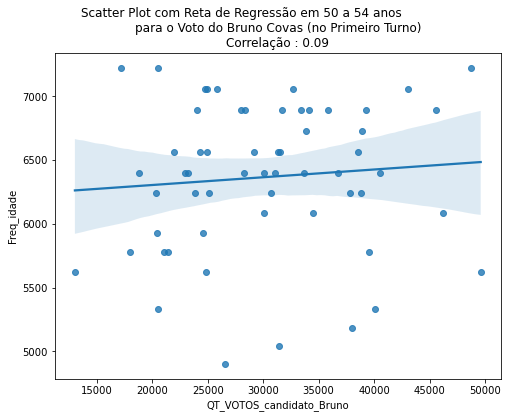

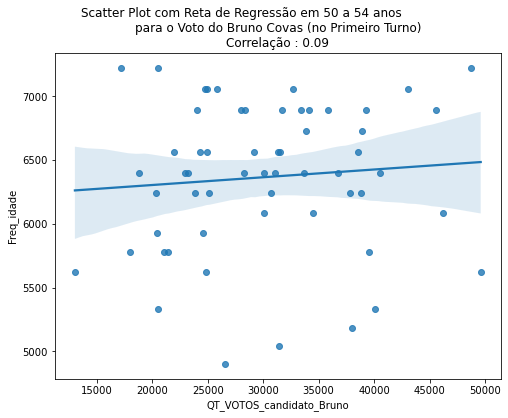

75 a 79 anos                  


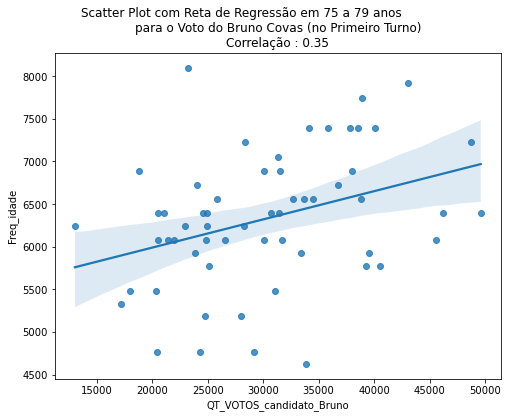

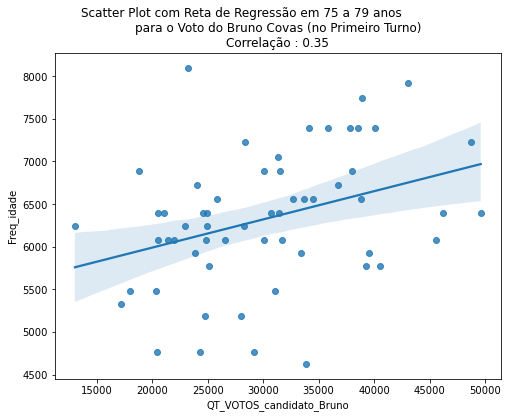

80 a 84 anos                  


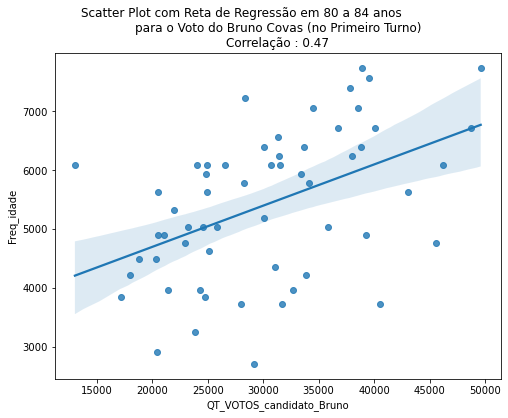

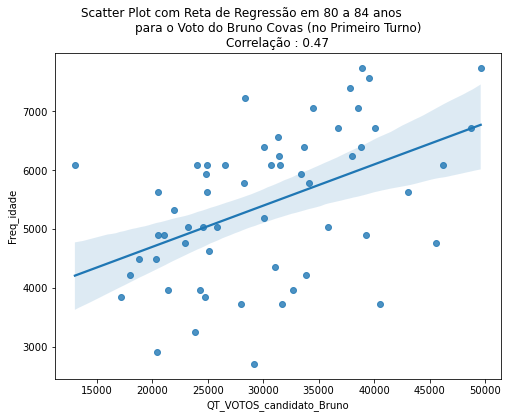

45 a 49 anos                  


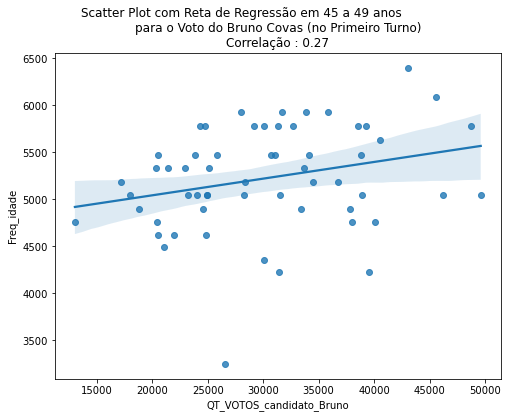

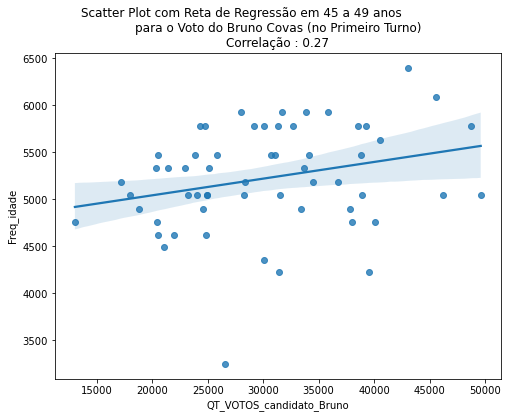

40 a 44 anos                  


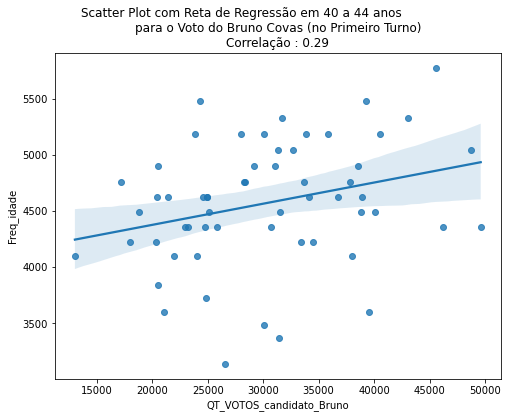

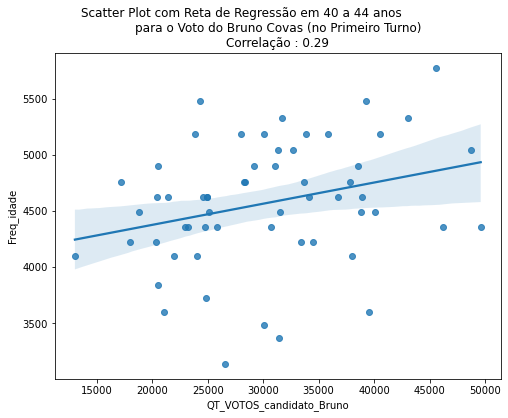

85 a 89 anos                  


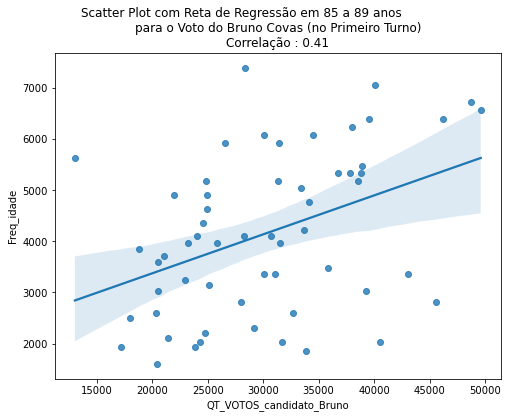

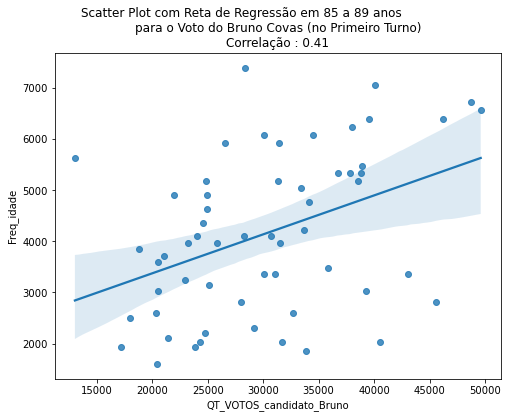

35 a 39 anos                  


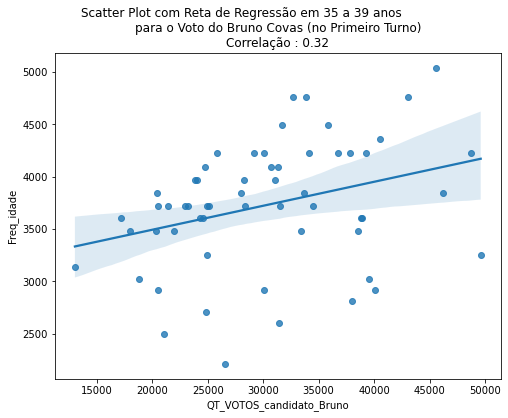

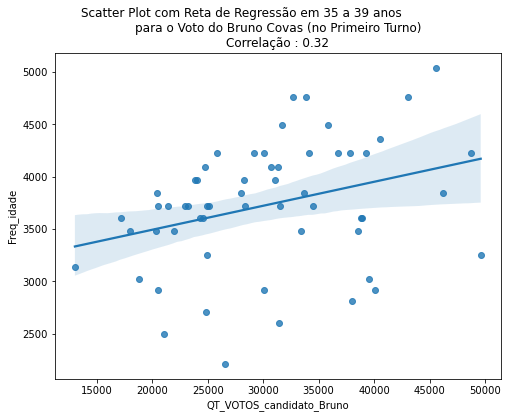

90 a 94 anos                  


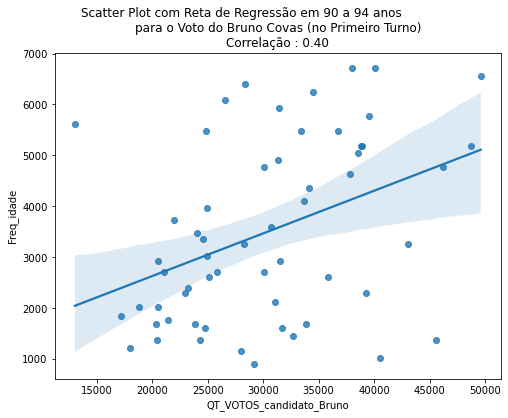

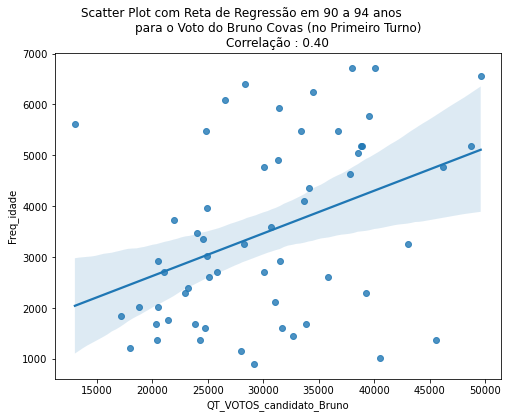

30 a 34 anos                  


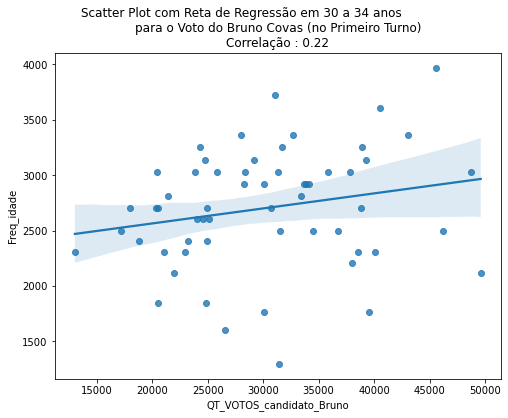

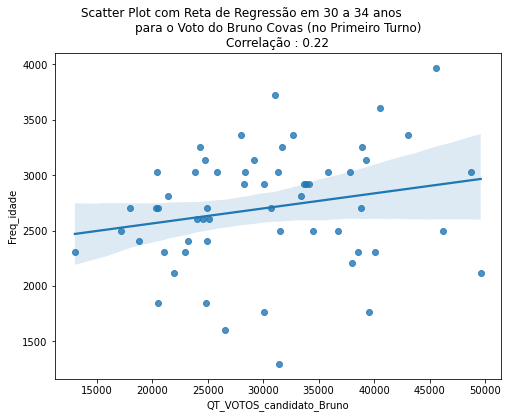

95 a 99 anos                  


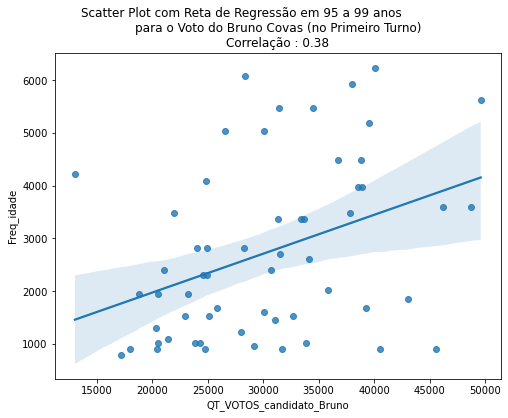

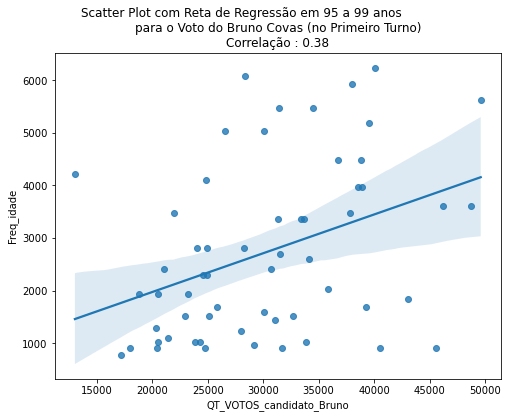

25 a 29 anos                  


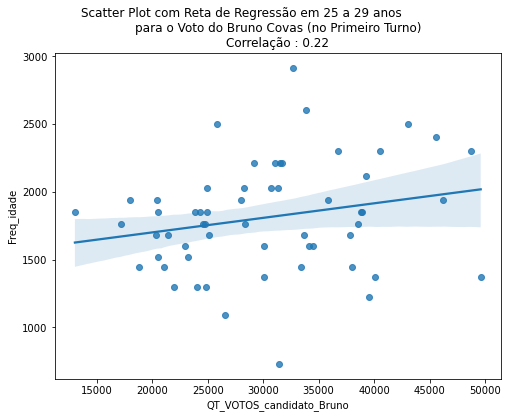

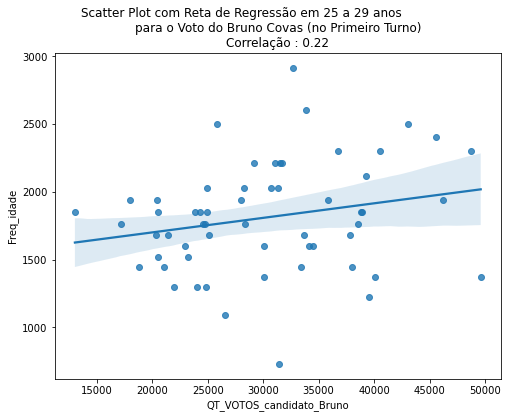

21 a 24 anos                  


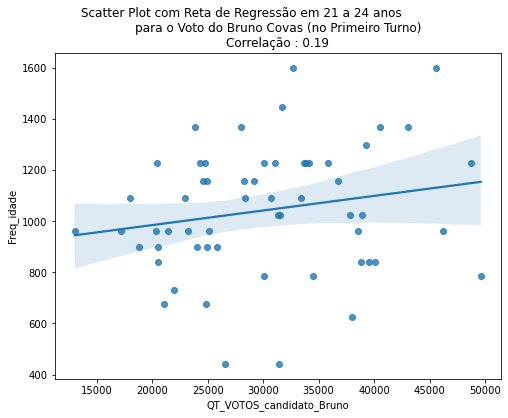

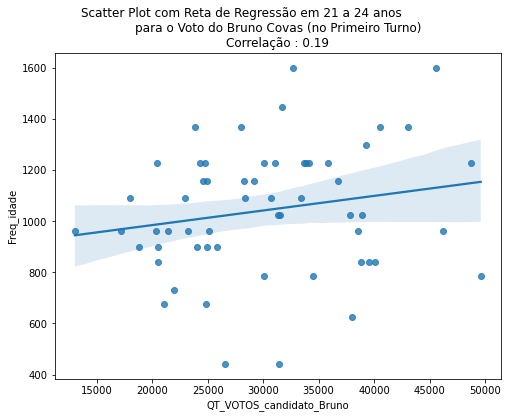

100 anos ou mais              


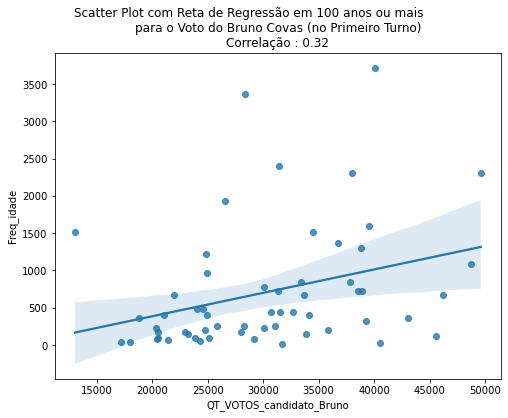

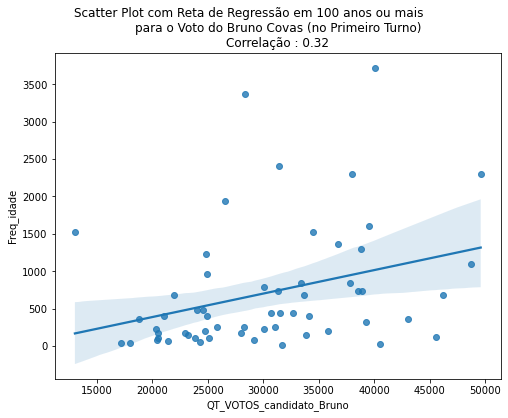

20 anos                       


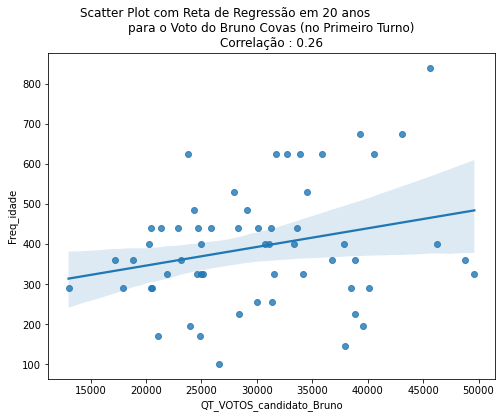

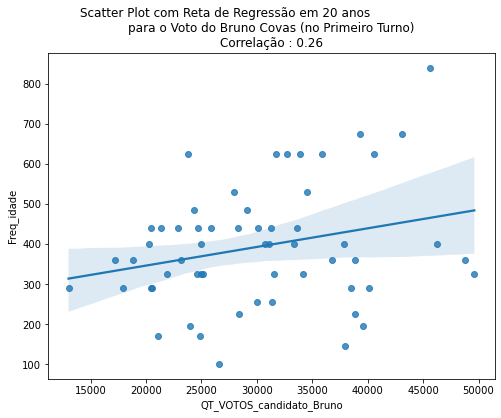

19 anos                       


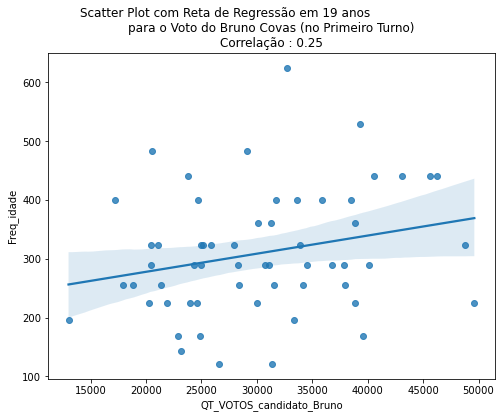

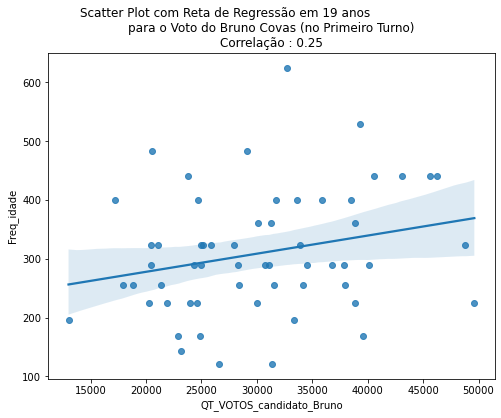

18 anos                       


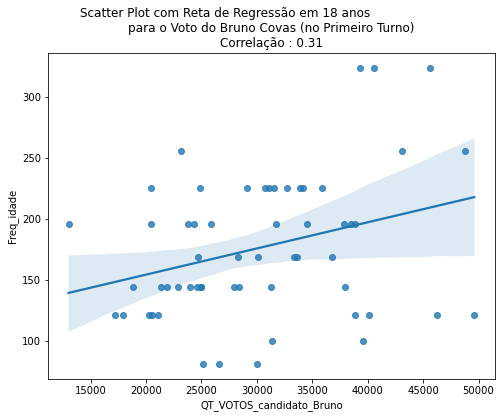

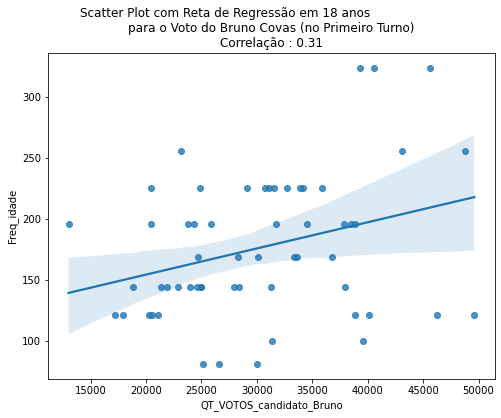

17 anos                       


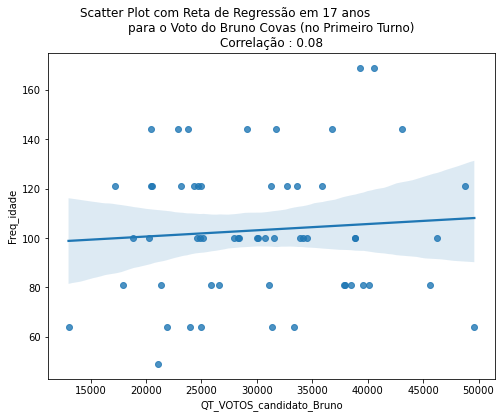

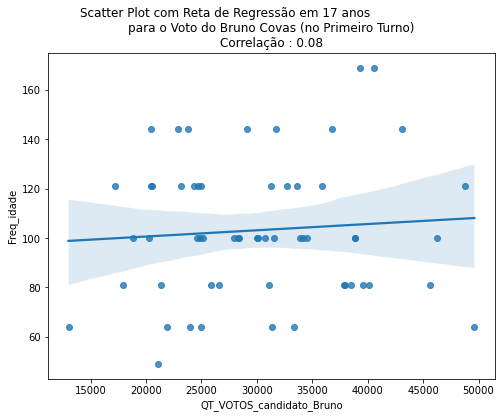

16 anos                       


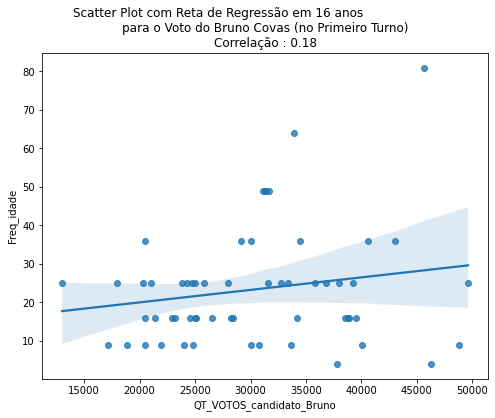

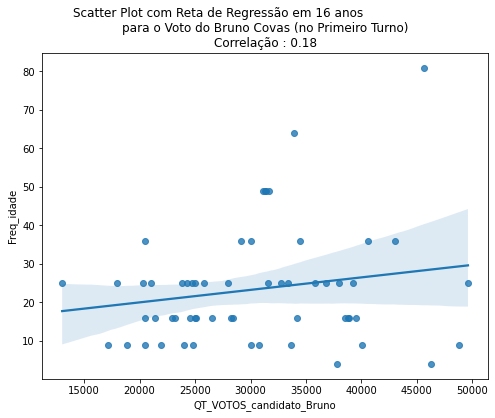

Inválido                      


<Figure size 576x432 with 0 Axes>

In [51]:
correlacao_idade=[]
for faixa_idade in dados_idade['DS_FAIXA_ETARIA']:
   
    print(faixa_idade)
    try:
        faixa_df= analise_idade(faixa_idade)
       # display(faixa_df)


        grafico_correlacao(faixa_idade,faixa_df)
        valor_cor= grafico_correlacao(faixa_idade,faixa_df)
        if valor_cor> 0.40:
            correlacao_idade.append([valor_cor,faixa_idade])
        else:
            pass
    except ValueError: 
        pass

## Análise com base no Coeficiente de Pearson.

In [52]:
print('Lista da faixa de idade com a maior correlação em relação ao voto do Bruno Covas no primeiro turno  ')
for cor, faixa in correlacao_idade:
    print('Correlação de {:.2f} na faixa de idade de: {}'.format(cor, faixa))
    
print() 

Lista da faixa de idade com a maior correlação em relação ao voto do Bruno Covas no primeiro turno  
Correlação de 0.47 na faixa de idade de: 80 a 84 anos                  
Correlação de 0.41 na faixa de idade de: 85 a 89 anos                  



# Análise pela escolaridade

In [53]:
#sns.heatmap(correlacao, cmap='RdBu', font='.2f', square= False, linecolor='white', annot=True)

In [54]:


columns_to_select = ['NM_MUNICIPIO','NR_ZONA','CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE']  # Substitua pelos nomes das colunas que você deseja selecionar

perfil_Grau_cadastrado = pd.read_csv('perfil_eleitorado_2020.csv', sep=";",encoding='ISO-8859-1',usecols=columns_to_select)

In [55]:
perfil_Grau_cadastrado

,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE
0,SÃO BENTO DO SAPUCAÍ,314,3,ENSINO FUNDAMENTAL INCOMPLETO
1,SÃO BENTO DO SAPUCAÍ,314,4,ENSINO FUNDAMENTAL COMPLETO
2,SÃO BENTO DO SAPUCAÍ,314,5,ENSINO MÉDIO INCOMPLETO
3,SÃO BENTO DO SAPUCAÍ,314,6,ENSINO MÉDIO COMPLETO
4,SÃO BENTO DO SAPUCAÍ,314,8,SUPERIOR COMPLETO
...,...,...,...,...
4248502,FLOR DA SERRA DO SUL,140,3,ENSINO FUNDAMENTAL INCOMPLETO
4248503,FLOR DA SERRA DO SUL,140,4,ENSINO FUNDAMENTAL COMPLETO
4248504,FLOR DA SERRA DO SUL,140,6,ENSINO MÉDIO COMPLETO
4248505,FLOR DA SERRA DO SUL,140,8,SUPERIOR COMPLETO


In [56]:

perfil_Grau_cadastrado['Freq'] = perfil_Grau_cadastrado.groupby(['NM_MUNICIPIO', 'NR_ZONA','DS_GRAU_ESCOLARIDADE'])['DS_GRAU_ESCOLARIDADE'].transform('count')



In [57]:
perfil_Grau_cadastrado_SP= perfil_Grau_cadastrado.loc[(perfil_Grau_cadastrado['NM_MUNICIPIO'] == 'SÃO PAULO') ]

In [58]:
perfil_Grau_cadastrado_SP

,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
63223,SÃO PAULO,3,8,SUPERIOR COMPLETO,152
63224,SÃO PAULO,3,1,ANALFABETO,101
63225,SÃO PAULO,3,2,LÊ E ESCREVE,150
63226,SÃO PAULO,3,3,ENSINO FUNDAMENTAL INCOMPLETO,170
63227,SÃO PAULO,3,4,ENSINO FUNDAMENTAL COMPLETO,154
...,...,...,...,...,...
3979871,SÃO PAULO,280,7,SUPERIOR INCOMPLETO,122
3979872,SÃO PAULO,280,8,SUPERIOR COMPLETO,143
3979873,SÃO PAULO,280,1,ANALFABETO,122
3979874,SÃO PAULO,280,2,LÊ E ESCREVE,158


In [59]:
dados_grau= pd.DataFrame(perfil_Grau_cadastrado_SP['DS_GRAU_ESCOLARIDADE'].value_counts())
dados_grau= dados_grau.reset_index()

# perfil da escolaridade na cidade de SP, na fonte do TSE.

In [60]:
dados_grau

,DS_GRAU_ESCOLARIDADE,count
0,ENSINO FUNDAMENTAL INCOMPLETO,9667
1,ENSINO MÉDIO COMPLETO,9126
2,ENSINO FUNDAMENTAL COMPLETO,8923
3,LÊ E ESCREVE,8779
4,ENSINO MÉDIO INCOMPLETO,8399
5,SUPERIOR COMPLETO,7942
6,SUPERIOR INCOMPLETO,7338
7,ANALFABETO,6662


In [61]:
def analise_grau(grau_texto):
    estudo = perfil_Grau_cadastrado_SP.loc[(perfil_Grau_cadastrado_SP['DS_GRAU_ESCOLARIDADE'] == grau_texto)] 

   # idade = perfil_idadeSP.loc[(perfil_idadeSP['DS_FAIXA_ETARIA'].str.strip() == periodo_texto)] 
    estudo_new = pd.DataFrame(estudo.groupby(['NM_MUNICIPIO','NR_ZONA','CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE'], as_index=False).agg({'Freq':'sum'}))    
    return (estudo_new)

In [62]:
def grafico_correlacao_grau(grau_texto,estudo_new2):

    correlacao = primeiroTURNO_Bruno1['QT_VOTOS'].corr(estudo_new2['Freq'])

    # Exemplo de plot de scatter plot com reta de regressão e valor de correlação
    plt.figure(figsize=(8, 6))
    sns.regplot(x=primeiroTURNO_Bruno1['QT_VOTOS'], y=estudo_new2['Freq'])
    plt.title(f'Scatter Plot com Reta de Regressão para {grau_texto} \npara o Voto do Bruno Covas (no Primeiro Turno)\nCorrelação : {correlacao:.2f}')
    plt.xlabel('QT_VOTOS_candidato_Bruno')
    plt.ylabel('Freq_escolaridade')
    plt.show()
    
    return correlacao

ENSINO FUNDAMENTAL INCOMPLETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,3,ENSINO FUNDAMENTAL INCOMPLETO,29929
1,SÃO PAULO,2,3,ENSINO FUNDAMENTAL INCOMPLETO,26896
2,SÃO PAULO,3,3,ENSINO FUNDAMENTAL INCOMPLETO,28900
3,SÃO PAULO,4,3,ENSINO FUNDAMENTAL INCOMPLETO,29241
4,SÃO PAULO,5,3,ENSINO FUNDAMENTAL INCOMPLETO,20736
5,SÃO PAULO,6,3,ENSINO FUNDAMENTAL INCOMPLETO,26244
6,SÃO PAULO,20,3,ENSINO FUNDAMENTAL INCOMPLETO,28561
7,SÃO PAULO,246,3,ENSINO FUNDAMENTAL INCOMPLETO,25921
8,SÃO PAULO,247,3,ENSINO FUNDAMENTAL INCOMPLETO,29241
9,SÃO PAULO,248,3,ENSINO FUNDAMENTAL INCOMPLETO,33124


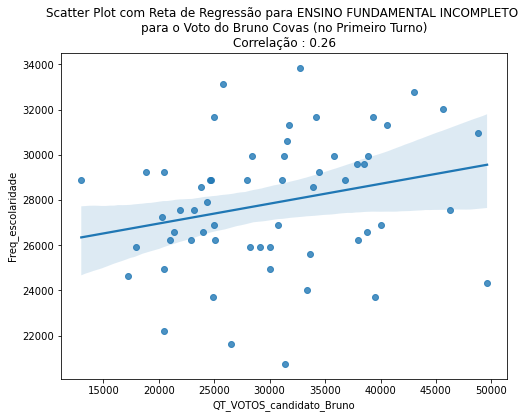

ENSINO MÉDIO COMPLETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,6,ENSINO MÉDIO COMPLETO,33124
1,SÃO PAULO,2,6,ENSINO MÉDIO COMPLETO,32041
2,SÃO PAULO,3,6,ENSINO MÉDIO COMPLETO,28224
3,SÃO PAULO,4,6,ENSINO MÉDIO COMPLETO,31329
4,SÃO PAULO,5,6,ENSINO MÉDIO COMPLETO,26569
5,SÃO PAULO,6,6,ENSINO MÉDIO COMPLETO,28900
6,SÃO PAULO,20,6,ENSINO MÉDIO COMPLETO,20164
7,SÃO PAULO,246,6,ENSINO MÉDIO COMPLETO,30625
8,SÃO PAULO,247,6,ENSINO MÉDIO COMPLETO,22801
9,SÃO PAULO,248,6,ENSINO MÉDIO COMPLETO,25600


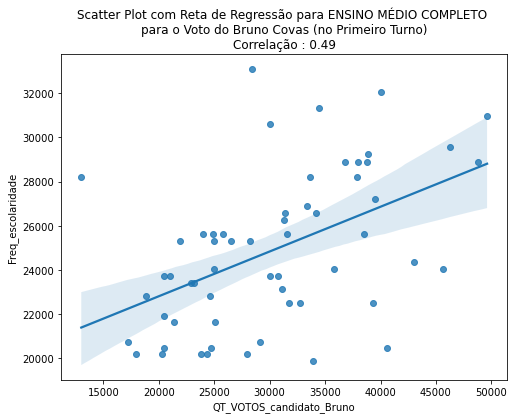

ENSINO FUNDAMENTAL COMPLETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,4,ENSINO FUNDAMENTAL COMPLETO,27225
1,SÃO PAULO,2,4,ENSINO FUNDAMENTAL COMPLETO,24649
2,SÃO PAULO,3,4,ENSINO FUNDAMENTAL COMPLETO,23716
3,SÃO PAULO,4,4,ENSINO FUNDAMENTAL COMPLETO,30625
4,SÃO PAULO,5,4,ENSINO FUNDAMENTAL COMPLETO,20449
5,SÃO PAULO,6,4,ENSINO FUNDAMENTAL COMPLETO,24025
6,SÃO PAULO,20,4,ENSINO FUNDAMENTAL COMPLETO,19044
7,SÃO PAULO,246,4,ENSINO FUNDAMENTAL COMPLETO,21609
8,SÃO PAULO,247,4,ENSINO FUNDAMENTAL COMPLETO,22500
9,SÃO PAULO,248,4,ENSINO FUNDAMENTAL COMPLETO,23409


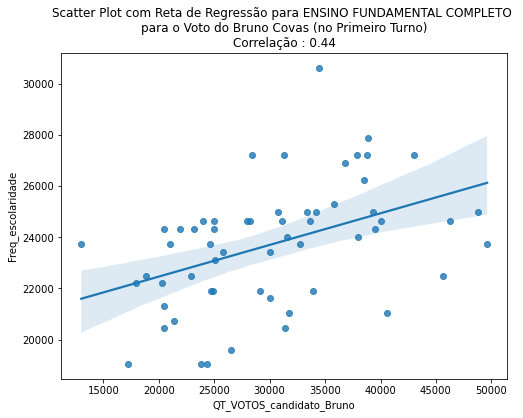

LÊ E ESCREVE


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,2,LÊ E ESCREVE,25600
1,SÃO PAULO,2,2,LÊ E ESCREVE,24025
2,SÃO PAULO,3,2,LÊ E ESCREVE,22500
3,SÃO PAULO,4,2,LÊ E ESCREVE,26569
4,SÃO PAULO,5,2,LÊ E ESCREVE,20164
5,SÃO PAULO,6,2,LÊ E ESCREVE,19881
6,SÃO PAULO,20,2,LÊ E ESCREVE,22201
7,SÃO PAULO,246,2,LÊ E ESCREVE,17689
8,SÃO PAULO,247,2,LÊ E ESCREVE,22201
9,SÃO PAULO,248,2,LÊ E ESCREVE,23716


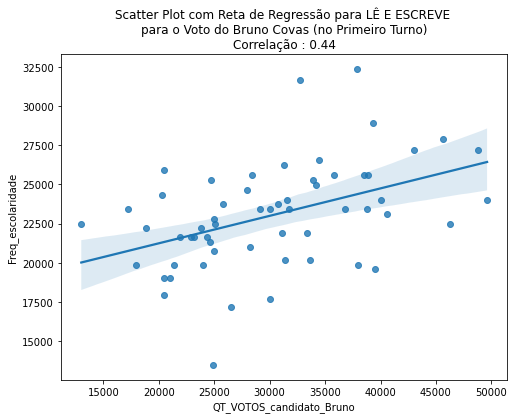

ENSINO MÉDIO INCOMPLETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,5,ENSINO MÉDIO INCOMPLETO,30276
1,SÃO PAULO,2,5,ENSINO MÉDIO INCOMPLETO,26896
2,SÃO PAULO,3,5,ENSINO MÉDIO INCOMPLETO,23104
3,SÃO PAULO,4,5,ENSINO MÉDIO INCOMPLETO,25921
4,SÃO PAULO,5,5,ENSINO MÉDIO INCOMPLETO,21904
5,SÃO PAULO,6,5,ENSINO MÉDIO INCOMPLETO,25600
6,SÃO PAULO,20,5,ENSINO MÉDIO INCOMPLETO,17956
7,SÃO PAULO,246,5,ENSINO MÉDIO INCOMPLETO,22801
8,SÃO PAULO,247,5,ENSINO MÉDIO INCOMPLETO,16900
9,SÃO PAULO,248,5,ENSINO MÉDIO INCOMPLETO,19044


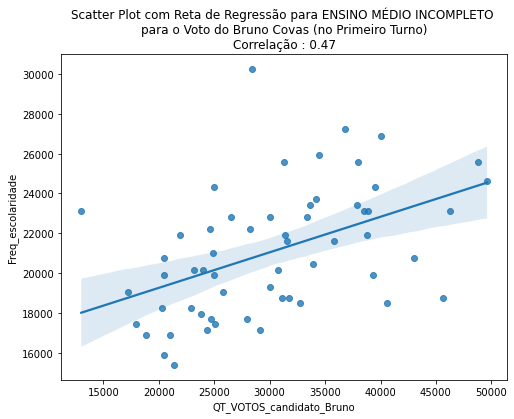

SUPERIOR COMPLETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,8,SUPERIOR COMPLETO,27556
1,SÃO PAULO,2,8,SUPERIOR COMPLETO,26896
2,SÃO PAULO,3,8,SUPERIOR COMPLETO,23104
3,SÃO PAULO,4,8,SUPERIOR COMPLETO,22801
4,SÃO PAULO,5,8,SUPERIOR COMPLETO,26896
5,SÃO PAULO,6,8,SUPERIOR COMPLETO,26896
6,SÃO PAULO,20,8,SUPERIOR COMPLETO,14641
7,SÃO PAULO,246,8,SUPERIOR COMPLETO,25281
8,SÃO PAULO,247,8,SUPERIOR COMPLETO,18225
9,SÃO PAULO,248,8,SUPERIOR COMPLETO,16641


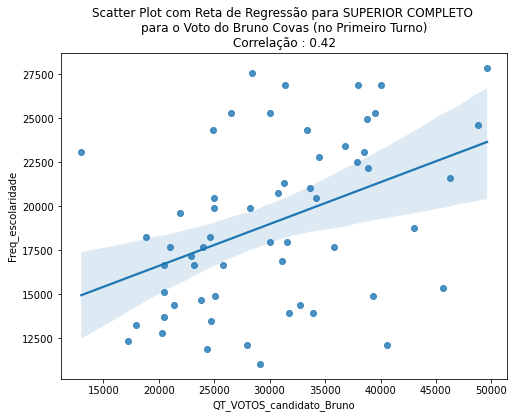

SUPERIOR INCOMPLETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,7,SUPERIOR INCOMPLETO,26569
1,SÃO PAULO,2,7,SUPERIOR INCOMPLETO,25921
2,SÃO PAULO,3,7,SUPERIOR INCOMPLETO,17161
3,SÃO PAULO,4,7,SUPERIOR INCOMPLETO,21316
4,SÃO PAULO,5,7,SUPERIOR INCOMPLETO,24025
5,SÃO PAULO,6,7,SUPERIOR INCOMPLETO,23716
6,SÃO PAULO,20,7,SUPERIOR INCOMPLETO,11236
7,SÃO PAULO,246,7,SUPERIOR INCOMPLETO,19321
8,SÃO PAULO,247,7,SUPERIOR INCOMPLETO,12544
9,SÃO PAULO,248,7,SUPERIOR INCOMPLETO,14641


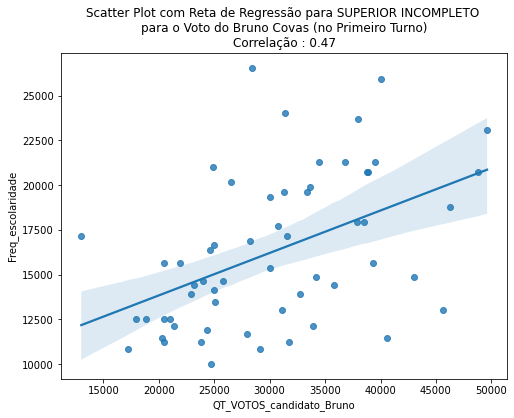

ANALFABETO


,NM_MUNICIPIO,NR_ZONA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,Freq
0,SÃO PAULO,1,1,ANALFABETO,12996
1,SÃO PAULO,2,1,ANALFABETO,8836
2,SÃO PAULO,3,1,ANALFABETO,10201
3,SÃO PAULO,4,1,ANALFABETO,8836
4,SÃO PAULO,5,1,ANALFABETO,5776
5,SÃO PAULO,6,1,ANALFABETO,8649
6,SÃO PAULO,20,1,ANALFABETO,14884
7,SÃO PAULO,246,1,ANALFABETO,7921
8,SÃO PAULO,247,1,ANALFABETO,12769
9,SÃO PAULO,248,1,ANALFABETO,15876


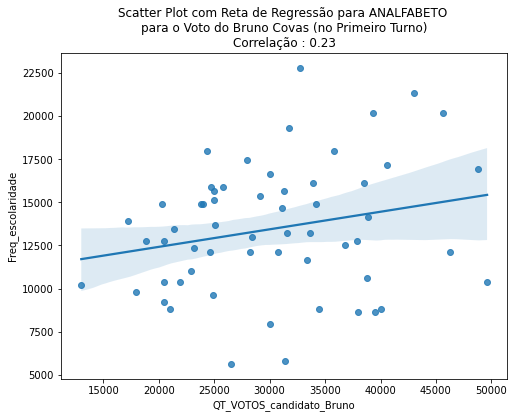

In [63]:
for faixa_grau in dados_grau['DS_GRAU_ESCOLARIDADE']:
    print(faixa_grau)
    grau_df= analise_grau(faixa_grau)
    display(grau_df)
    
    
    grafico_correlacao_grau(faixa_grau,grau_df)

ENSINO FUNDAMENTAL INCOMPLETO


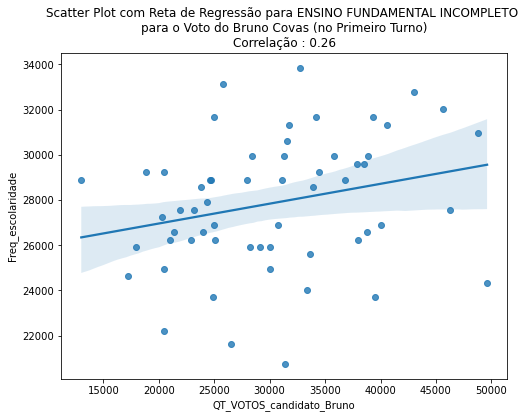

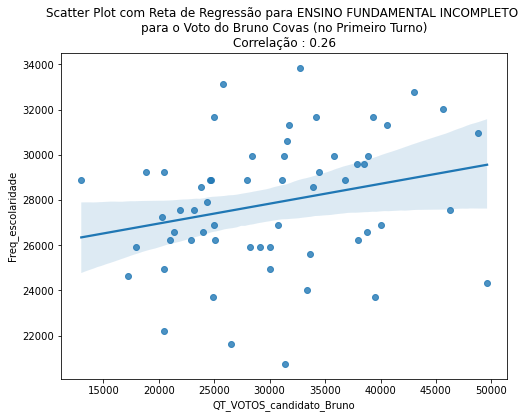

ENSINO MÉDIO COMPLETO


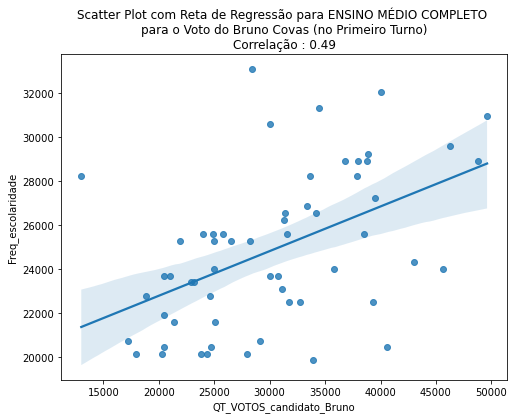

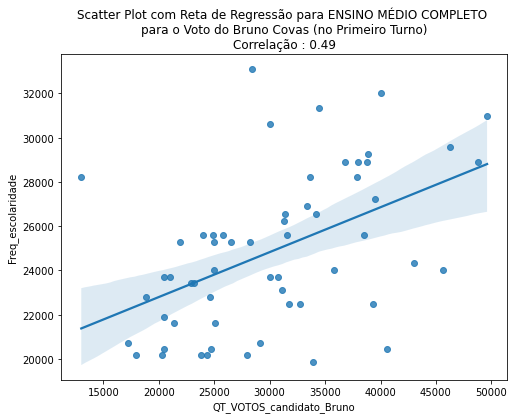

ENSINO FUNDAMENTAL COMPLETO


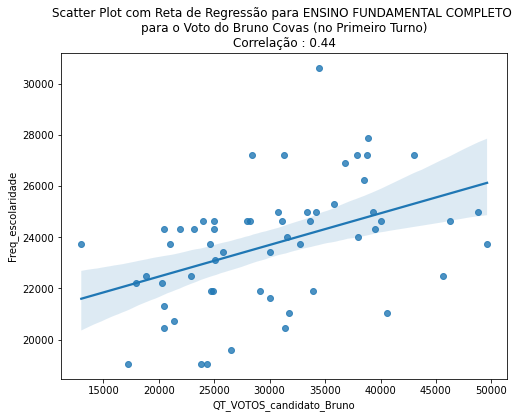

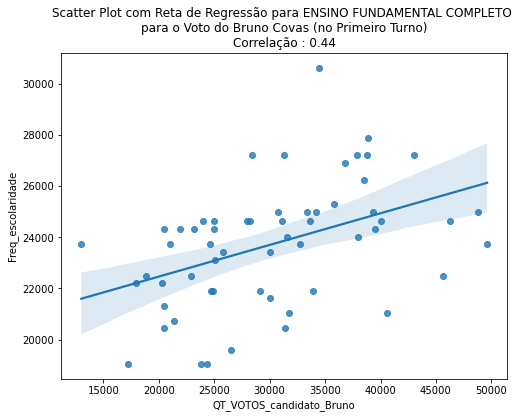

LÊ E ESCREVE


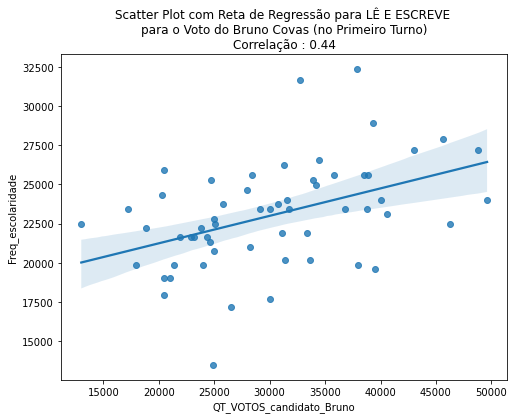

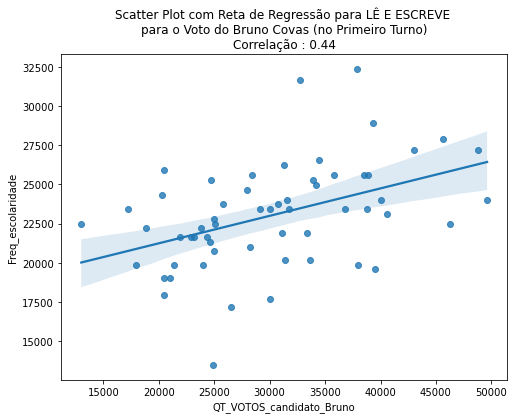

ENSINO MÉDIO INCOMPLETO


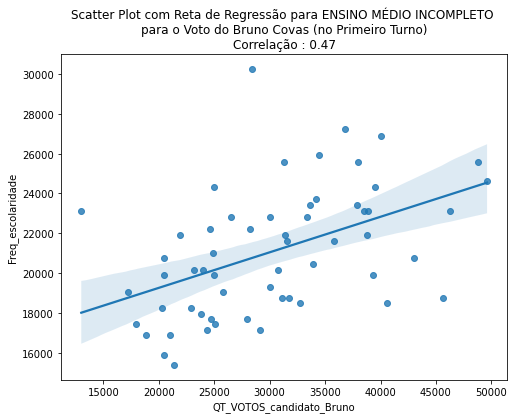

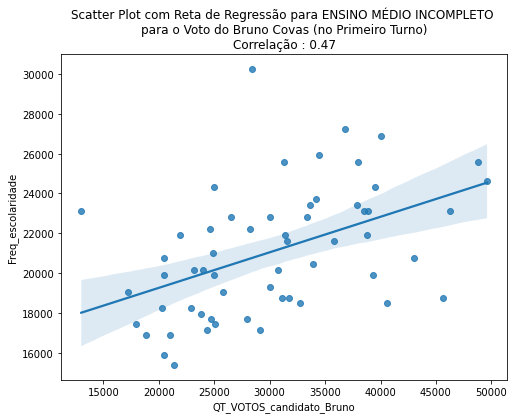

SUPERIOR COMPLETO


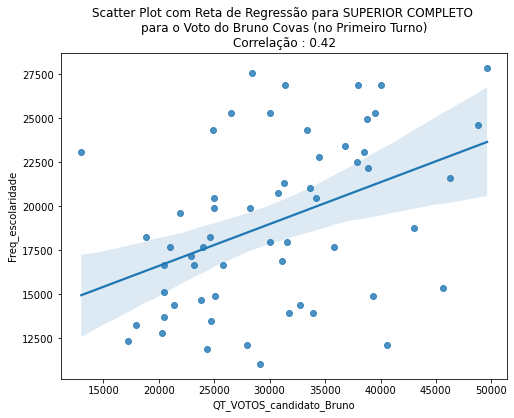

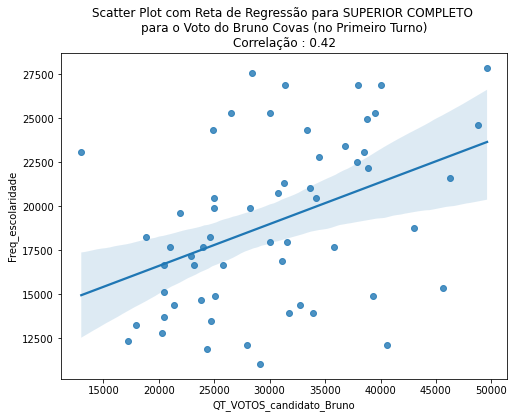

SUPERIOR INCOMPLETO


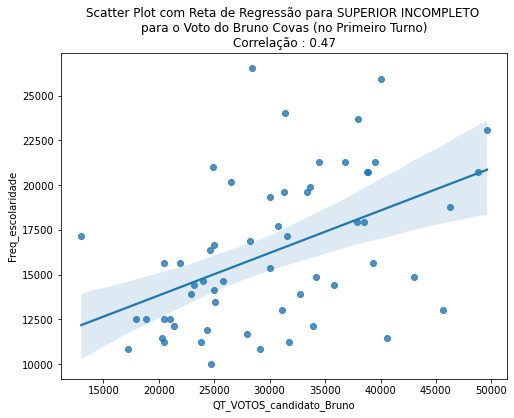

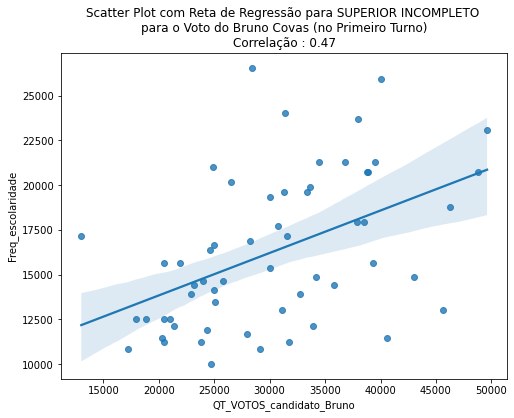

ANALFABETO


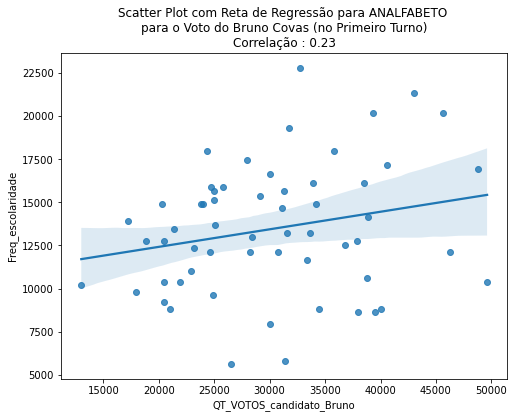

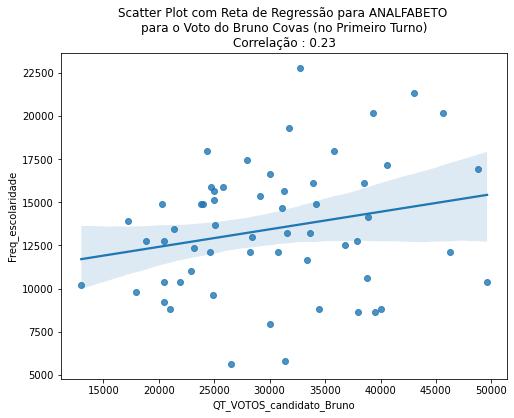

In [64]:
correlacao_grau=[]
for faixa_grau in dados_grau['DS_GRAU_ESCOLARIDADE']:
    print(faixa_grau)
    grau_df= analise_grau(faixa_grau)
    #display(grau_df)
    
    valor_cor= float(grafico_correlacao_grau(faixa_grau,grau_df))
    
    grafico_correlacao_grau(faixa_grau,grau_df)
    if valor_cor>0.45:
        correlacao_grau.append([valor_cor,faixa_grau])
    else:
        pass

In [65]:

print('Lista do grau de estudo do eleitor (conforme a última atualização do eleitorado) que teve maior correlação com o maior votação de Bruno Covas no primeiro turno  ')
for cor, grau in correlacao_grau:
    print('Correlação de {:.2f} para o cadastrado no sistema do TSE com grau de escolaridade: {}'.format(cor, grau))
    
print() 
print('Ressalta-se que os dados que estão no sistema, podem estar atualizados ou não.') 
print('Pois, pode ocorrer de não representar o grau de escolaridade atual do eleitor , uma vez que , após o alistamento , informação pode não ter sido atualizada junto à Justiça Eleitoral pelo eleitor')
    

Lista do grau de estudo do eleitor (conforme a última atualização do eleitorado) que teve maior correlação com o maior votação de Bruno Covas no primeiro turno  
Correlação de 0.49 para o cadastrado no sistema do TSE com grau de escolaridade: ENSINO MÉDIO COMPLETO
Correlação de 0.47 para o cadastrado no sistema do TSE com grau de escolaridade: ENSINO MÉDIO INCOMPLETO
Correlação de 0.47 para o cadastrado no sistema do TSE com grau de escolaridade: SUPERIOR INCOMPLETO

Ressalta-se que os dados que estão no sistema, podem estar atualizados ou não.
Pois, pode ocorrer de não representar o grau de escolaridade atual do eleitor , uma vez que , após o alistamento , informação pode não ter sido atualizada junto à Justiça Eleitoral pelo eleitor


In [66]:
#Teste

In [67]:
#contador=0
import pandas as pd
tabela_genero = pd.DataFrame()
for chunk in pd.read_csv('perfil_eleitorado_2020.csv',  sep=";",encoding='ISO-8859-1',chunksize=10000) :

   #     Chunk_filtrado = chunk[['NM_MUNICIPIO','NR_ZONA','CD_GENERO', 'DS_GENERO','QT_ELEITORES_INC_NM_SOCIAL'] ] 

    Chunk_filtrado = chunk[['NM_MUNICIPIO','NR_ZONA','CD_GENERO', 'DS_GENERO'] ] 
 
    tabela_genero =pd.concat([tabela_genero,Chunk_filtrado])

In [68]:
tabela_genero

,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO
0,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO
1,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO
2,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO
3,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO
4,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO
...,...,...,...,...
4248502,FLOR DA SERRA DO SUL,140,4,FEMININO
4248503,FLOR DA SERRA DO SUL,140,4,FEMININO
4248504,FLOR DA SERRA DO SUL,140,4,FEMININO
4248505,FLOR DA SERRA DO SUL,140,4,FEMININO


In [69]:
#tabela_genero2 = tabela_genero.drop(columns=['QT_ELEITORES_INC_NM_SOCIAL'], inplace=True)

In [70]:
tabela_genero['Freq'] = tabela_genero.groupby(['NM_MUNICIPIO', 'NR_ZONA','DS_GENERO'])['DS_GENERO'].transform('count')
perfil_genero_cadastrado_SP= tabela_genero.loc[(tabela_genero['NM_MUNICIPIO'] == 'SÃO PAULO') ]
perfil_genero_cadastrado_SP

,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,Freq
63223,SÃO PAULO,3,2,MASCULINO,575
63224,SÃO PAULO,3,2,MASCULINO,575
63225,SÃO PAULO,3,2,MASCULINO,575
63226,SÃO PAULO,3,2,MASCULINO,575
63227,SÃO PAULO,3,2,MASCULINO,575
...,...,...,...,...,...
3979871,SÃO PAULO,280,2,MASCULINO,566
3979872,SÃO PAULO,280,2,MASCULINO,566
3979873,SÃO PAULO,280,2,MASCULINO,566
3979874,SÃO PAULO,280,2,MASCULINO,566


In [71]:
dados_generos= pd.DataFrame(perfil_genero_cadastrado_SP['DS_GENERO'].value_counts())
dados_generos= dados_generos.reset_index()

In [72]:
dados_generos

,DS_GENERO,count
0,FEMININO,33860
1,MASCULINO,31688
2,NÃO INFORMADO,1288


In [73]:
def analise_genero(genero_texto):
    genero = perfil_genero_cadastrado_SP.loc[(perfil_genero_cadastrado_SP['DS_GENERO'] == genero_texto)] 

    genero_new = pd.DataFrame(genero.groupby(['NM_MUNICIPIO','NR_ZONA','DS_GENERO'], as_index=False).agg({'Freq':'sum'}))    
    return (genero_new)

In [74]:
def grafico_correlacao_genero(genero_texto,genero_new2):

    correlacao = primeiroTURNO_Bruno1['QT_VOTOS'].corr(genero_new2['Freq'])

    # Exemplo de plot de scatter plot com reta de regressão e valor de correlação
    plt.figure(figsize=(8, 6))
    sns.regplot(x=primeiroTURNO_Bruno1['QT_VOTOS'], y=genero_new2['Freq'])
    plt.title(f'Scatter Plot com Reta de Regressão para o Gênero:{genero_texto} \npara o Voto do Bruno Covas (no Primeiro Turno)\nCorrelação : {correlacao:.2f}')
    plt.xlabel('QT_VOTOS_candidato_Bruno')
    plt.ylabel('Freq_Genero')
    plt.show()
    
    return correlacao

FEMININO


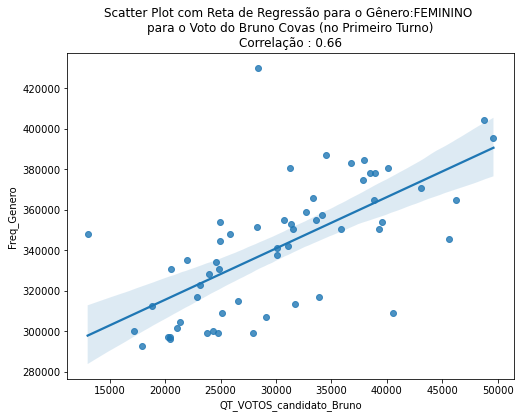

MASCULINO


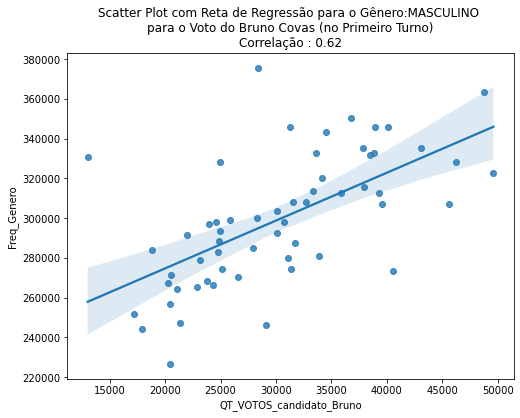

NÃO INFORMADO


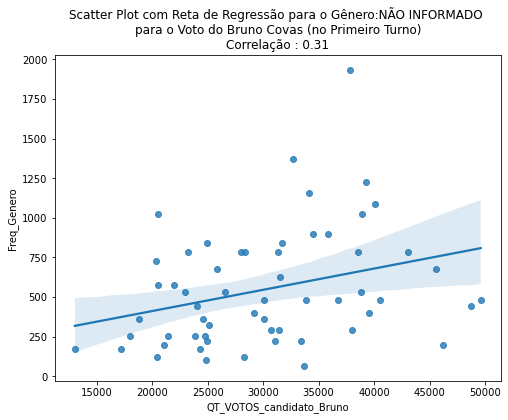

In [75]:
correlacao_genero=[]
for genero in dados_generos['DS_GENERO']:
    print(genero)
    genero_df= analise_genero(genero)
    #display(grau_df)
    
    valor_cor= float(grafico_correlacao_genero(genero,genero_df))
    
   # grafico_correlacao_genero(genero,genero_df)
    if valor_cor>0.45:
        correlacao_genero.append([valor_cor,genero])
    else:
        pass

In [76]:
print('Boa correlação do voto para o Bruno Covas para os Gêneros masculino e feminino, sendo maior para o gênero feminino.  ')

Boa correlação do voto para o Bruno Covas para os Gêneros masculino e feminino, sendo maior para o gênero feminino.  
